# ESG INVESTING PROJECT
## A project of Matteo Conterno, Rodolfo Petrelli and Matteo Ling

## Important libraries to import

In [ ]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [ ]:
# mount to access content in order to use google
# from google.colab import drive
# drive.mount('/content/drive')

# ESG Scoring

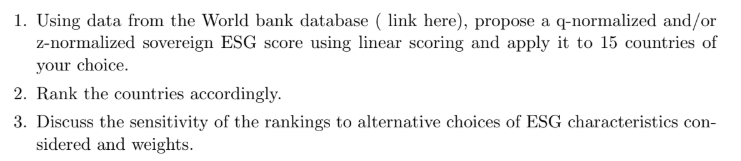

## Import tha dataset

I have the given asset on the link and now I am gonna to upload, and select the following 15 states:
- Argentina
- Zimbabwe
- United States
- Norway
- Sierra Leone
- Mexico
- United Kingdom
- China
- Japan
- Australia
- Viet Nam
- Uruguay
- Austria
- Germany
- Canada

In [ ]:
#change the required path
path = "P_Data_Extract_From_Environment_Social_and_Governance_(ESG)_Data.xlsx"
with pd.option_context('future.no_silent_downcasting', True):
    df = pd.read_excel(
        path
        ).replace(
            {'..':pd.NA}
        ).dropna(
            how="all" # remove all empty rows
        ).iloc[:-2].convert_dtypes()

countries = np.array(
    [
    "Argentina",
    "Zimbabwe",
    "United States",
    "Norway",
    "Sierra Leone",
    "Mexico",
    "United Kingdom",
    "China",
    "Japan",
    "Australia",
    "Viet Nam",
    "Uruguay",
    "Austria",
    "Germany",
    "Canada"
    ]
)
#select given countries
df = df[df["Country Name"].isin(countries)]
data = df.columns.tolist()
# convert to digi years
years = [item.split(' ')[0] for item in data[4:]]
df.columns = data[:4] + years
display(df)

,Country Name,Country Code,Series Name,Series Code,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
426,Argentina,ARG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,99.7,99.8,99.8,99.8,99.9,99.9,99.9,99.9,<NA>,<NA>
427,Argentina,ARG,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.0,99.689034,99.899742,100.0,99.993736,100.0,100.0,100.0,<NA>,<NA>
428,Argentina,ARG,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,2.36143,0.841522,0.662926,0.748123,1.563824,1.667223,0.979579,2.051995,<NA>,<NA>
429,Argentina,ARG,Adjusted savings: net forest depletion (% of GNI),NY.ADJ.DFOR.GN.ZS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,<NA>,<NA>
430,Argentina,ARG,Agricultural land (% of land area),AG.LND.AGRI.ZS,44.283021,44.118771,43.479495,42.986381,42.371536,42.590779,43.029265,43.102346,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14550,Zimbabwe,ZWE,Terrestrial and marine protected areas (% of t...,ER.PTD.TOTL.ZS,<NA>,<NA>,27.214542,27.214585,27.214585,27.214747,27.214747,27.214747,27.214747,<NA>
14551,Zimbabwe,ZWE,Tree Cover Loss (hectares),AG.LND.FRLS.HA,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
14552,Zimbabwe,ZWE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,4.77,5.412,5.918,6.349,6.767,7.37,8.651,9.54,9.256,9.116
14553,Zimbabwe,ZWE,Unmet need for contraception (% of married wom...,SP.UWT.TFRT,10.382129,10.4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


# Define as measure the Z-scoring for scaling the datas

Since there are many values with no value or very small fluctuacting we have decided to opt for the z-score.
The z-score used is the classical one used by dividing the difference between the value and the mean and divide it all by standard deviation.

$z = \frac{x - \mu}{\sigma}$

In the following code I applied the analysis over one year, but in the next cells i apply it over all years.

In [ ]:
value = "2017" # I took  a value casually
# Extract the unique codes
codes = df["Series Code"].unique().tolist()
countries = df["Country Name"].unique().tolist()
# initialize the zscore to NaN and add the metric of zscore
zscores = pd.DataFrame(pd.NA, columns=["Country"] + codes, index=range(len(countries)))
zscores["Country"] = countries
for code in codes:
    code_selected = df[df["Series Code"] == code][value].reset_index(drop=True)
    zscores[code] = (code_selected-code_selected.mean())/code_selected.std()
columns_names =df.set_index('Series Code')['Series Name'].to_dict()
display(zscores.rename(columns_names, axis="columns"))

,Country,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Adjusted savings: natural resources depletion (% of GNI),Adjusted savings: net forest depletion (% of GNI),Agricultural land (% of land area),"Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)","Annualized average growth rate in per capita real survey mean consumption or income, total population (%)","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)",...,"School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)",Scientific and technical journal articles,Standardised Precipitation-Evapotranspiration Index,Strength of legal rights index (0=weak to 12=strong),Terrestrial and marine protected areas (% of total territorial area),Tree Cover Loss (hectares),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Unmet need for contraception (% of married women ages 15-49),Voice and Accountability: Estimate
0,Argentina,0.489045,0.374423,-0.3628,-0.346835,0.03825,-0.159064,0.071002,<NA>,<NA>,...,1.177424,0.643464,-0.551934,0.193967,-1.509763,-0.75802,-0.31774,1.921921,<NA>,-0.006485
1,Australia,0.495735,0.374423,-0.019652,-0.346835,0.283152,-0.326808,-1.011838,<NA>,<NA>,...,-0.490885,-1.959003,-0.248178,-0.862662,1.625898,1.062245,-0.314226,0.390244,<NA>,0.744888
2,Austria,0.495735,0.374423,-0.585535,-0.334883,-0.456516,-0.425918,-0.608539,<NA>,<NA>,...,-0.420352,-0.87509,-0.524476,0.451473,-0.812949,0.955266,-0.574653,0.373596,<NA>,0.752136
3,Canada,0.495735,0.374423,-0.492842,-0.346835,-1.632716,-0.380827,-1.13392,<NA>,<NA>,...,-0.772383,0.19424,-0.206933,-0.619721,0.929085,-0.833751,2.454854,0.856407,<NA>,0.833382
4,China,-0.327145,0.374423,-0.371323,-0.346835,0.616241,-0.010944,0.929312,<NA>,<NA>,...,-0.901102,0.44025,2.500635,-1.111511,-1.161356,-0.171835,0.171399,-0.231305,<NA>,-1.805045
5,Germany,0.495735,0.374423,-0.603501,-0.346835,0.256738,-0.449729,1.099973,<NA>,<NA>,...,-0.324557,-1.321463,0.107561,0.049776,-0.116136,1.803176,-0.557256,-0.630873,<NA>,0.793152
6,Japan,0.495735,0.374423,-0.608853,-0.346835,-1.328365,-0.431366,0.644114,<NA>,<NA>,...,-0.24659,0.164755,0.061654,-1.594945,-0.464542,-0.544099,-0.539847,-1.146981,<NA>,0.413897
7,Mexico,-0.016056,0.374423,-0.02801,-0.346835,0.353135,-0.287419,0.958396,<NA>,<NA>,...,0.288592,1.263253,-0.502815,-0.591669,1.277492,0.19286,-0.240411,-0.814008,<NA>,-0.552066
8,Norway,0.495735,0.374423,0.72321,-0.346835,-1.804532,-0.378916,-1.192694,<NA>,<NA>,...,-0.697262,-0.690264,-0.531682,1.923764,-0.464542,-0.949349,-0.527553,-0.403341,<NA>,1.025136
9,Sierra Leone,-2.829235,-2.864615,3.003394,3.328558,0.574507,3.516044,-1.251913,<NA>,<NA>,...,2.784636,0.208507,-0.608955,-0.985081,-0.464542,-1.0933,-0.319131,-0.518217,<NA>,-0.646154


## Define the ESG Linear Scoring

We have opted for the following weights using only a subset of the features since some of them are redundant or derivate from other quantities. Using the following strategy 40% Environment, 30% Governance and Social as done in many cases by rating agency.

**Environmental (40% of total)**

Climate & Emissions (15%)

- CO2 emissions per capita: 3%
- Methane emissions per capita: 3%
- Nitrous oxide emissions per capita: 3%
- Fossil fuel energy consumption: 3%
- GHG net emissions/removals: 3%

Resource Management (10%)

- Energy intensity level: 2%
- Energy imports dependency: 2%
- Renewable energy consumption: 2%
- Renewable electricity output: 2%
- Annual freshwater withdrawals: 2%

Biodiversity & Land Use (10%)

- Forest area percentage: 2%
- Agricultural land percentage: 2%
- Terrestrial and marine protected areas: 2%
- Tree cover loss: 2%
- Mammal species threatened: 2%

Pollution & Waste (5%)

- PM2.5 air pollution exposure: 1.25%
- Water stress level: 1.25%
- Proportion of bodies of water with good quality: 1.25%
- Access to clean fuels and technologies: 1.25%

**Social (30% of total)**

Health & Wellbeing (10%)

- Life expectancy: 2%
- Mortality rate (under-5): 2%
- Hospital beds per 1,000 people: 2%
- Prevalence of undernourishment: 2%
- Prevalence of overweight: 2%

Education & Skills (5%)

- Literacy rate: 1%
- Government expenditure on education: 1%
- School enrollment (primary): 1%
- School enrollment gender parity: 1%
- Scientific journal articles: 1%

Equity & Inclusion (10%)

- Gini index: 1.67%
- Income share held by lowest 20%: 1.67%
- Poverty headcount ratio: 1.67%
- Labor force participation rate: 1.67%
- Ratio of female to male labor force participation: 1.67%
- Proportion of seats held by women in parliament: 1.67%

Basic Services (5%)

- Access to electricity: 1.25%
- People using safely managed drinking water: 1.25%
- People using safely managed sanitation: 1.25%
- Internet usage percentage: 1.25%

**Governance (30% of total)**

Institutional Quality (20%)

- Control of Corruption: 3.33%
- Government Effectiveness: 3.33%
- Regulatory Quality: 3.33%
- Rule of Law: 3.33%
- Voice and Accountability: 3.33%
- Political Stability: 3.33%

Economic Governance (10%)

- GDP growth: 2.5%
- Research and development expenditure: 2.5%
- Patent applications: 2.5%
- Strength of legal rights index: 2.5%

The single weights of every code is assigned by taking the pecentage associated divide by the number of code, in this way every single asset for that camp is equally weighted.

In [ ]:
weights = {
        # Environmental (40%)
        # Climate & Emissions (15%)
        'EN.ATM.CO2E.PC': 0.03,  # CO2 emissions (metric tons per capita)
        'EN.ATM.METH.PC': 0.03,  # Methane emissions
        'EN.ATM.NOXE.PC': 0.03,  # Nitrous oxide emissions
        'EG.USE.COMM.FO.ZS': 0.03,  # Fossil fuel energy consumption
        'EN.CLC.GHGR.MT.CE': 0.03,  # GHG net emissions/removals

        # Resource Management (10%)
        'EG.EGY.PRIM.PP.KD': 0.02,  # Energy intensity level
        'EG.IMP.CONS.ZS': 0.02,  # Energy imports dependency
        'EG.FEC.RNEW.ZS': 0.02,  # Renewable energy consumption
        'EG.ELC.RNEW.ZS': 0.02,  # Renewable electricity output
        'ER.H2O.FWTL.ZS': 0.02,  # Annual freshwater withdrawals

        # Biodiversity & Land Use (10%)
        'AG.LND.FRST.ZS': 0.02,  # Forest area
        'AG.LND.AGRI.ZS': 0.02,  # Agricultural land
        'ER.PTD.TOTL.ZS': 0.02,  # Protected areas
        'AG.LND.FRLS.HA': 0.02,  # Tree cover loss (inverted)
        'EN.MAM.THRD.NO': 0.02,  # Mammal species threatened (inverted)

        # Pollution & Waste (5%)
        'EN.ATM.PM25.MC.M3': 0.0125,  # PM2.5 air pollution
        'ER.H2O.FWST.ZS': 0.0125,  # Water stress level
        'EN.H2O.BDYS.ZS': 0.0125,  # Bodies of water with good quality
        'EG.CFT.ACCS.ZS': 0.0125,  # Access to clean fuels

        # Social (30%)
        # Health & Wellbeing (10%)
        'SP.DYN.LE00.IN': 0.02,  # Life expectancy
        'SH.DYN.MORT': 0.02,  # Mortality rate (inverted)
        'SH.MED.BEDS.ZS': 0.02,  # Hospital beds
        'SN.ITK.DEFC.ZS': 0.02,  # Prevalence of undernourishment (inverted)
        'SH.STA.OWAD.ZS': 0.02,  # Prevalence of overweight (inverted)

        # Education & Skills (5%)
        'SE.ADT.LITR.ZS': 0.01,  # Literacy rate
        'SE.XPD.TOTL.GB.ZS': 0.01,  # Government expenditure on education
        'SE.PRM.ENRR': 0.01,  # School enrollment (primary)
        'SE.ENR.PRSC.FM.ZS': 0.01,  # School enrollment gender parity
        'IP.JRN.ARTC.SC': 0.01,  # Scientific journal articles

        # Equity & Inclusion (10%)
        'SI.POV.GINI': 0.0167,  # Gini index (inverted)
        'SI.DST.FRST.20': 0.0167,  # Income share held by lowest 20%
        'SI.POV.NAHC': 0.0167,  # Poverty headcount (inverted)
        'SL.TLF.ACTI.ZS': 0.0167,  # Labor force participation
        'SL.TLF.CACT.FM.ZS': 0.0167,  # Ratio of female to male labor force
        'SG.GEN.PARL.ZS': 0.0167,  # Proportion of seats held by women

        # Basic Services (5%)
        'EG.ELC.ACCS.ZS': 0.0125,  # Access to electricity
        'SH.H2O.SMDW.ZS': 0.0125,  # Safely managed drinking water
        'SH.STA.SMSS.ZS': 0.0125,  # Safely managed sanitation
        'IT.NET.USER.ZS': 0.0125,  # Internet usage

        # Governance (30%)
        # Institutional Quality (20%)
        'CC.EST': 0.0333,  # Control of Corruption
        'GE.EST': 0.0333,  # Government Effectiveness
        'RQ.EST': 0.0333,  # Regulatory Quality
        'RL.EST': 0.0333,  # Rule of Law
        'VA.EST': 0.0333,  # Voice and Accountability
        'PV.EST': 0.0333,  # Political Stability

        # Economic Governance (10%)
        'NY.GDP.MKTP.KD.ZG': 0.025,  # GDP growth
        'GB.XPD.RSDV.GD.ZS': 0.025,  # R&D expenditure
        'IP.PAT.RESD': 0.025,  # Patent applications
        'IC.LGL.CRED.XQ': 0.025  # Strength of legal rights
    }



Let's apply the weights to the dataset and extract the different variables normalized:

In [ ]:
# add Z-scored to distinguish values
df_copy = df.copy()
df_copy = df_copy[df_copy["Series Code"].isin(weights.keys())]
new_columns = np.char.add(years, ' Z-scored')
df_copy[new_columns] = pd.NA
#add weight column
df_copy["weights"] = df_copy["Series Code"].map(weights)
#calculate z-score for every year add weights
for name in weights.keys():
    selected = df_copy[df_copy["Series Code"] == name][years]
    zscore = (selected - selected.mean())/selected.std()
    df_copy.loc[zscore.index, new_columns] = zscore.values
df_copy

,Country Name,Country Code,Series Name,Series Code,2014,2015,2016,2017,2018,2019,...,2015 Z-scored,2016 Z-scored,2017 Z-scored,2018 Z-scored,2019 Z-scored,2020 Z-scored,2021 Z-scored,2022 Z-scored,2023 Z-scored,weights
426,Argentina,ARG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,99.7,99.8,99.8,99.8,99.9,99.9,...,0.516456,0.501737,0.489045,0.480433,0.471202,0.463141,0.455547,<NA>,<NA>,0.0125
427,Argentina,ARG,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.0,99.689034,99.899742,100.0,99.993736,100.0,...,0.371867,0.374565,0.374423,0.376181,0.375359,0.371688,0.372487,<NA>,<NA>,0.0125
430,Argentina,ARG,Agricultural land (% of land area),AG.LND.AGRI.ZS,44.283021,44.118771,43.479495,42.986381,42.371536,42.590779,...,0.089468,0.068859,0.03825,0.021137,0.026731,0.054424,0.055031,<NA>,<NA>,0.0200
432,Argentina,ARG,"Annual freshwater withdrawals, total (% of int...",ER.H2O.FWTL.ZS,12.907534,12.907534,12.907534,12.907534,12.907534,12.907534,...,0.074361,0.068596,0.071002,0.043779,0.044074,0.054364,<NA>,<NA>,<NA>,0.0200
436,Argentina,ARG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,4.209112,4.301914,4.201816,4.070112,3.975651,3.74203,...,-0.540665,-0.548516,-0.562374,-0.578631,-0.618574,-0.63773,<NA>,<NA>,<NA>,0.0300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,Zimbabwe,ZWE,Scientific and technical journal articles,IP.JRN.ARTC.SC,269.02,269.92,316.99,334.71,406.23,431.62,...,-0.620419,-0.615033,-0.607012,-0.591462,-0.572269,-0.562736,<NA>,<NA>,<NA>,0.0100
14549,Zimbabwe,ZWE,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,5.0,5.0,5.0,5.0,5.0,6.0,...,-0.44598,-0.44598,-0.464542,-0.464542,-0.140422,<NA>,<NA>,<NA>,<NA>,0.0250
14550,Zimbabwe,ZWE,Terrestrial and marine protected areas (% of t...,ER.PTD.TOTL.ZS,<NA>,<NA>,27.214542,27.214585,27.214585,27.214747,...,<NA>,0.987922,0.858686,0.858686,0.855074,0.722764,0.705466,0.704002,<NA>,0.0200
14551,Zimbabwe,ZWE,Tree Cover Loss (hectares),AG.LND.FRLS.HA,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.0200


## Calculate the ESG linear score of every country by year

In [ ]:
esg_scores = pd.DataFrame(pd.NA, index=range(15), columns=["Country"] + years)
#some nasty warning due to pandas that I removedin this way
esg_scores["Country"] = esg_scores["Country"].astype(str)
for ind,(country, datas) in enumerate(df_copy.groupby("Country Name")):
    #calcula esg score as multiplication of matrix z-score x weights
    esg_score = datas[new_columns].multiply(datas["weights"], axis=0).sum().tolist()
    esg_score.insert(0, country)
    esg_scores.iloc[ind] = esg_score
esg_scores

,Country,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Argentina,-0.340853,-0.312757,-0.30563,-0.272935,-0.326997,-0.316215,-0.303055,-0.196178,-0.162475,-0.022616
1,Australia,0.384106,0.340447,0.360852,0.343724,0.400081,0.393041,0.396898,0.1639,0.241758,0.007683
2,Austria,0.139268,0.145036,0.128432,0.135424,0.107446,0.133583,0.150487,0.176853,0.221081,0.00489
3,Canada,0.305096,0.309482,0.281702,0.273143,0.253597,0.292306,0.23266,0.228772,0.175105,0.011794
4,China,-0.093565,-0.14042,-0.109439,-0.06069,-0.046947,-0.07899,-0.044413,-0.092925,-0.230411,0.00305
5,Germany,0.228728,0.229241,0.248329,0.200349,0.168071,0.195004,0.197149,0.17838,0.194625,0.003608
6,Japan,0.162028,0.184251,0.102115,0.124944,0.12021,0.088093,0.104861,0.108198,0.102321,-0.011958
7,Mexico,-0.277571,-0.254661,-0.281529,-0.357008,-0.271824,-0.324104,-0.361127,-0.3046,-0.250782,-0.045273
8,Norway,0.065077,0.090393,0.126336,0.136072,0.084788,0.126822,0.189444,0.166538,0.260085,0.015386
9,Sierra Leone,-0.418494,-0.498478,-0.431242,-0.403449,-0.373652,-0.368077,-0.415624,-0.235119,-0.368778,0.018538


## Plot the ranking

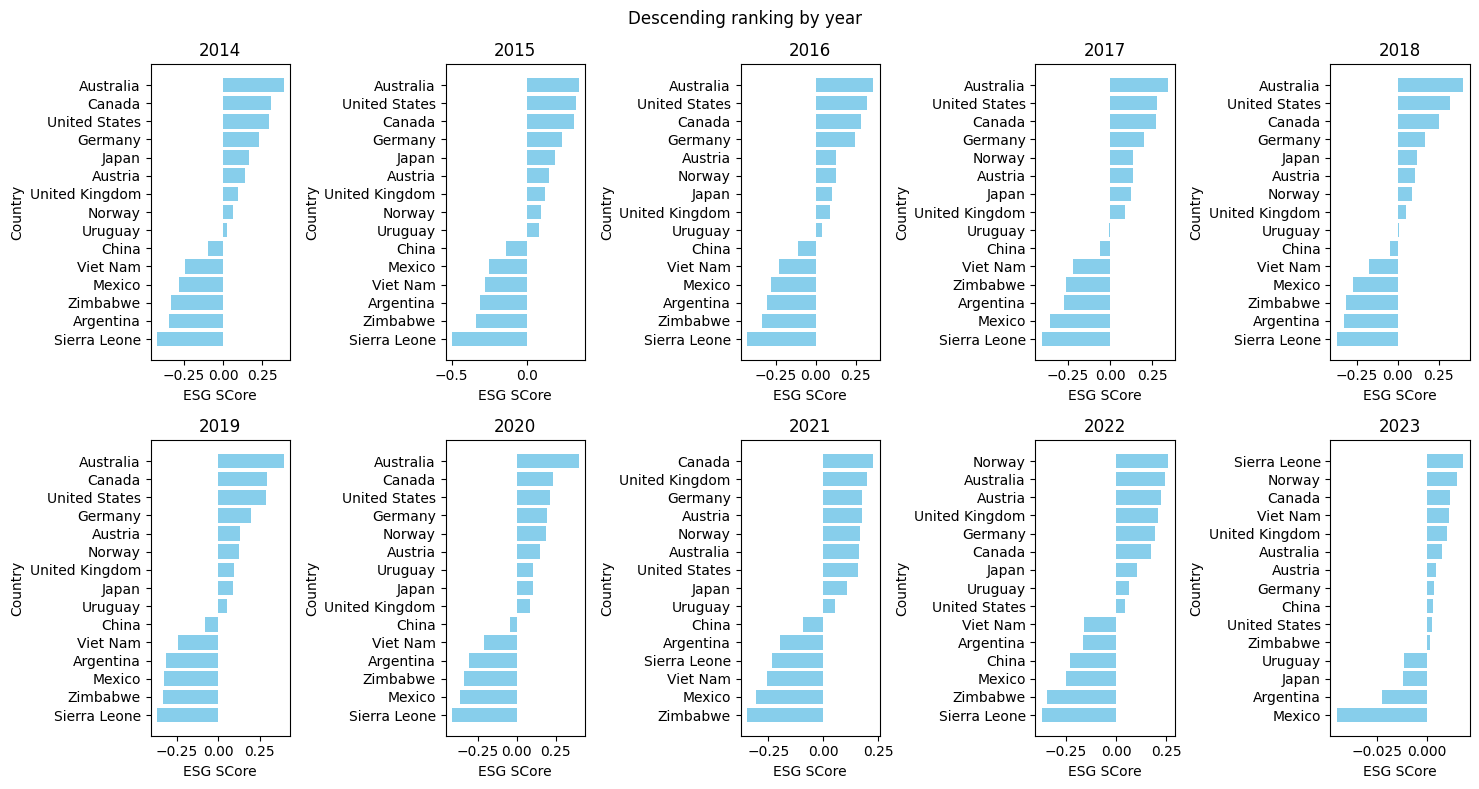

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
fig.suptitle("Descending ranking by year")
axes = axes.flatten()

# Loop through each year and create a subplot
for i, year in enumerate(years):
    # Sort by each year's values
    esg_sorted = esg_scores.sort_values(by=year, ascending=True)
    axes[i].barh(esg_sorted["Country"], esg_sorted[year], color="skyblue")
    axes[i].set_title(f"{year}")
    axes[i].set_xlabel("ESG SCore")
    axes[i].set_ylabel("Country")

plt.tight_layout()
plt.show()

## Sensitivity of the weights in case of uniform weight

Since we used only a subset of the feature, to understand the impact of a combination of weights we have decided to test the ranking if all the features are equally weighted.  

In [ ]:
df_copy = df.copy()
uniform_weights=dict.fromkeys(df_copy["Series Code"].unique(),  1/len(df_copy["Series Code"].unique()))
new_columns = np.char.add(years, ' Z-scored')
df_copy[new_columns] = pd.NA
#add weight column to be unifrom
df_copy["weights"] = df_copy["Series Code"].map(uniform_weights)
for name in uniform_weights.keys():
    selected = df_copy[df_copy["Series Code"] == name][years]
    zscore = (selected - selected.mean())/selected.std()
    df_copy.loc[zscore.index, new_columns] = zscore.values
df_copy

,Country Name,Country Code,Series Name,Series Code,2014,2015,2016,2017,2018,2019,...,2015 Z-scored,2016 Z-scored,2017 Z-scored,2018 Z-scored,2019 Z-scored,2020 Z-scored,2021 Z-scored,2022 Z-scored,2023 Z-scored,weights
426,Argentina,ARG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,99.7,99.8,99.8,99.8,99.9,99.9,...,0.516456,0.501737,0.489045,0.480433,0.471202,0.463141,0.455547,<NA>,<NA>,0.014085
427,Argentina,ARG,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.0,99.689034,99.899742,100.0,99.993736,100.0,...,0.371867,0.374565,0.374423,0.376181,0.375359,0.371688,0.372487,<NA>,<NA>,0.014085
428,Argentina,ARG,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,2.36143,0.841522,0.662926,0.748123,1.563824,1.667223,...,-0.292541,-0.327794,-0.3628,-0.052563,-0.002316,-0.246191,-0.190912,<NA>,<NA>,0.014085
429,Argentina,ARG,Adjusted savings: net forest depletion (% of GNI),NY.ADJ.DFOR.GN.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.34863,-0.333149,-0.346835,-0.304825,-0.341679,-0.348556,-0.332355,<NA>,<NA>,0.014085
430,Argentina,ARG,Agricultural land (% of land area),AG.LND.AGRI.ZS,44.283021,44.118771,43.479495,42.986381,42.371536,42.590779,...,0.089468,0.068859,0.03825,0.021137,0.026731,0.054424,0.055031,<NA>,<NA>,0.014085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14550,Zimbabwe,ZWE,Terrestrial and marine protected areas (% of t...,ER.PTD.TOTL.ZS,<NA>,<NA>,27.214542,27.214585,27.214585,27.214747,...,<NA>,0.987922,0.858686,0.858686,0.855074,0.722764,0.705466,0.704002,<NA>,0.014085
14551,Zimbabwe,ZWE,Tree Cover Loss (hectares),AG.LND.FRLS.HA,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.014085
14552,Zimbabwe,ZWE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,4.77,5.412,5.918,6.349,6.767,7.37,...,0.151607,0.464313,0.811455,0.976287,1.144512,0.901457,1.752344,2.280957,2.124666,0.014085
14553,Zimbabwe,ZWE,Unmet need for contraception (% of married wom...,SP.UWT.TFRT,10.382129,10.4,<NA>,<NA>,<NA>,<NA>,...,-0.188515,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.014085


In [ ]:
esg_scores = pd.DataFrame(pd.NA, index=range(15), columns=["Country"] + years)
esg_scores["Country"] = esg_scores["Country"].astype(str)
# repeat as before
for ind,(country, datas) in enumerate(df_copy.groupby("Country Name")):
    esg_score = datas[new_columns].multiply(datas["weights"], axis=0).sum().tolist()
    esg_score.insert(0, country)
    esg_scores.iloc[ind] = esg_score
esg_scores

,Country,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Argentina,-0.198521,-0.142286,-0.157127,-0.143233,-0.181833,-0.148579,-0.186285,-0.102742,-0.072509,-0.004104
1,Australia,0.224567,0.174201,0.163334,0.167264,0.19022,0.160787,0.197131,0.108345,0.126915,0.000263
2,Austria,0.029912,-0.017457,0.044425,0.020057,-0.019747,0.000679,0.033893,0.038071,0.117541,0.008754
3,Canada,0.139944,0.128612,0.147806,0.119,0.121371,0.12689,0.118325,0.055001,0.091629,0.015563
4,China,-0.030414,-0.018727,0.001756,-0.009335,0.026435,-0.029916,0.008196,-0.033488,-0.113746,0.005224
5,Germany,0.131851,0.107244,0.117303,0.090482,0.039834,0.088476,0.083876,0.054084,0.072679,-0.007196
6,Japan,0.100129,0.10755,0.072681,0.047942,0.098026,0.039351,0.058632,0.027977,0.006318,-0.022671
7,Mexico,-0.145416,-0.164906,-0.125728,-0.193677,-0.096006,-0.160047,-0.185807,-0.149478,-0.111799,-0.049638
8,Norway,-0.067455,-0.021348,-0.014926,0.01148,-0.052956,-0.026731,0.032951,0.041781,0.123452,0.005991
9,Sierra Leone,-0.177753,-0.200328,-0.217589,-0.195294,-0.138193,-0.094787,-0.153961,0.04252,-0.193623,0.006703


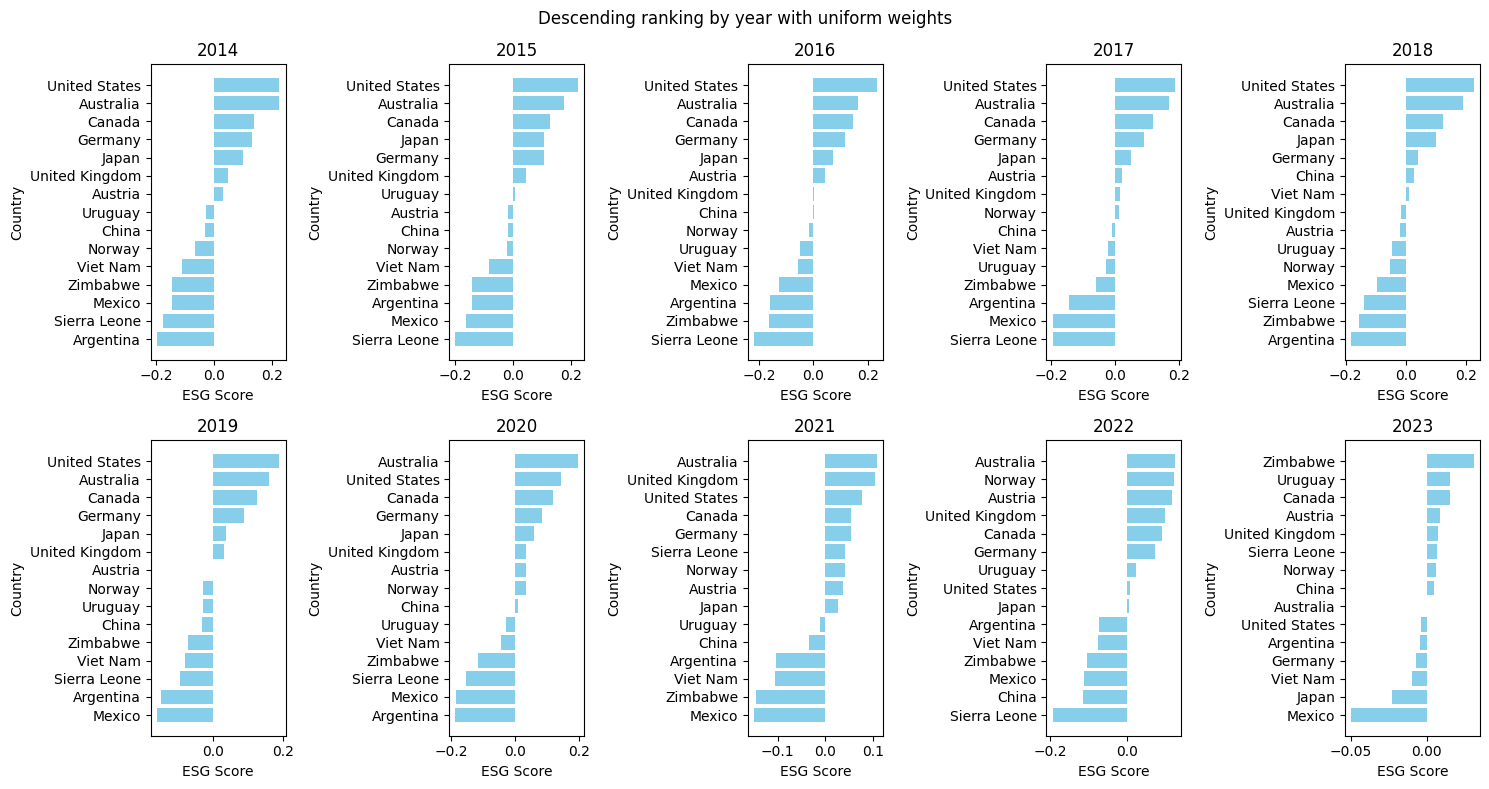

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
fig.suptitle("Descending ranking by year with uniform weights")
axes = axes.flatten()

# Loop through each year and create a subplot
for i, year in enumerate(years):
    # Sort by each year's values
    esg_sorted = esg_scores.sort_values(by=year, ascending=True)
    axes[i].barh(esg_sorted["Country"], esg_sorted[year], color="skyblue")
    axes[i].set_title(f"{year}")
    axes[i].set_xlabel("ESG Score")
    axes[i].set_ylabel("Country")

plt.tight_layout()
plt.show()

## Conclusion

In case we consider **all weights uniform** some strange results are obtained, since in that case some developing country as Sierra Leone in 2021 comes to the first places being over the position of Norway and Austria, being very unlikely.
Furthermore many developed countries oscillates significantly between the first and middle positions in the ranking with score that becomes in some cases negative.
This may be due to 2 important factors:
- many datas may be missing for some countries that may not contribute significantly to the final score negatively.
- There may be some collinearity between the dataset since some quantity are highly correlated such as the emission of methane and tree cover loss or livestock .

In the end I hink the first version of weights is better since there is a clear division between developed, emerging and not developed countries since with those classes there should be more commitment to ESG goals.
The weigths influence significantly mainly by reducing in many case **the esg final linear score**.

# ESG Investing in the CAPM framework
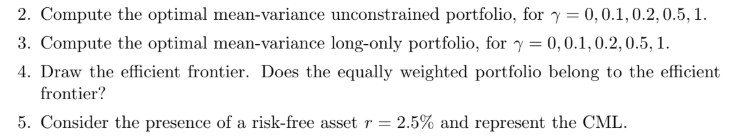

# Unconstrained portfolio
We compute the optimal mean-variance unconstrained portfolio for different values of gamma (risk adversion factor). We obtain the optimal weights for each gamma value

In [ ]:
# Data from the problem
mu = np.array([0.05, 0.055, 0.06, 0.04, 0.07, 0.065])
sigma = np.array([0.20, 0.22, 0.25, 0.18, 0.36, 0.35])
C = np.array([[1, 0.5, 0.3, 0.6, 0.4, 0.25],
              [0.5, 1, 0.3, 0.6, 0.3, 0.5],
              [0.3, 0.3, 1, 0.6, 0.7, 0.4],
              [0.6, 0.6, 0.6, 1, 0.3, 0.4],
              [0.4, 0.3, 0.7, 0.3, 1, 0.4],
              [0.25, 0.5, 0.4, 0.4, 0.4, 1]])

# Covariance matrix
Sigma = np.outer(sigma, sigma) * C

def portfolio_variance(weights, Sigma):
    return np.dot(weights.T, np.dot(Sigma, weights))

def portfolio_return(weights, mu):
    return np.dot(weights, mu)

# Optimization function for each value of gamma
def mean_variance_optimization(mu, Sigma, gamma):
    constraints = ({'type': 'ineq', 'fun': lambda weights: 1- np.sum(np.abs(weights))})
    bounds = tuple((-1, 1) for i in range(len(mu)))

    def objective(weights):
        return 0.5 * weights.T@Sigma@weights - gamma * weights.T@mu

    initial_weights = np.ones(len(mu)) / len(mu)

    result = opt.minimize(objective, initial_weights, bounds=bounds, constraints=constraints)
    return result.x

gamma_values = [0, 0.1, 0.2, 0.5, 1]

# Solve for each gamma
optimal_weights = {}
for gamma in gamma_values:
    optimal_weights[gamma] = mean_variance_optimization(mu, Sigma, gamma)

# Display results
for gamma, weights in optimal_weights.items():
    print(f"Optimal weights for gamma = {gamma}: {weights}, sum: {np.sum(np.abs(weights)):.4f}")

Optimal weights for gamma = 0: [ 0.00538122 -0.00861074  0.01019536  0.0031797  -0.0001254  -0.00651875], sum: 0.0340
Optimal weights for gamma = 0.1: [ 0.0962487   0.08335731  0.0944724  -0.07912595 -0.01868252  0.0091087 ], sum: 0.3810
Optimal weights for gamma = 0.2: [ 0.19973915  0.15872998  0.20751555 -0.15964087 -0.05029638  0.02085565], sum: 0.7968
Optimal weights for gamma = 0.5: [ 0.33034096  0.27024789  0.30479553 -0.04718427 -0.00273643  0.04469491], sum: 1.0000
Optimal weights for gamma = 1: [2.95575836e-01 3.07946178e-01 2.48988688e-01 1.03124236e-04
 7.80426392e-02 6.93435341e-02], sum: 1.0000


# Constrained portfolio
We find the optimal mean-variance long-only portfolio for different values of gamma

In [ ]:
# Optimization function for each value of gamma
def mean_variance_optimization(mu, Sigma, gamma):
    constraints = ({'type': 'eq', 'fun': lambda weights: 1-np.sum(weights)})
    bounds = tuple((0, 1) for asset in range(len(mu))) #long-only

    def objective(weights):
        return 0.5 * weights.T@Sigma@weights - gamma * weights.T@mu

    initial_weights = np.ones(len(mu)) / len(mu)

    # Solve minimization problem
    result = opt.minimize(objective, initial_weights, bounds=bounds, constraints=constraints)
    return result.x

gamma_values = [0, 0.1, 0.2, 0.5, 1]

# Solve for each gamma
optimal_weights = {}
for gamma in gamma_values:
    optimal_weights[gamma] = mean_variance_optimization(mu, Sigma, gamma)

# Display results
for gamma, weights in optimal_weights.items():
    print(f"Optimal weights for gamma = {gamma}: {weights}, sum: {np.sum(weights):.4f}")

Optimal weights for gamma = 0: [3.29523446e-01 1.84047959e-01 1.63598603e-01 3.22829992e-01
 0.00000000e+00 3.25260652e-19], sum: 1.0000
Optimal weights for gamma = 0.1: [0.32493373 0.21119046 0.19730778 0.2610452  0.         0.00552283], sum: 1.0000
Optimal weights for gamma = 0.2: [0.37658213 0.24064409 0.23998743 0.1221381  0.         0.02064825], sum: 1.0000
Optimal weights for gamma = 0.5: [3.54984999e-01 2.84206651e-01 3.17379862e-01 1.34441069e-17
 1.23599048e-17 4.34284884e-02], sum: 1.0000
Optimal weights for gamma = 1: [0.26029805 0.29400576 0.31823697 0.         0.03995373 0.08750548], sum: 1.0000


# Efficient frontier
We draw the efficient frontier of the optimal portfolio and notice that the benchmark (equally-weighted portfolio) is suboptimal i.e. does not belong to the efficient frontier

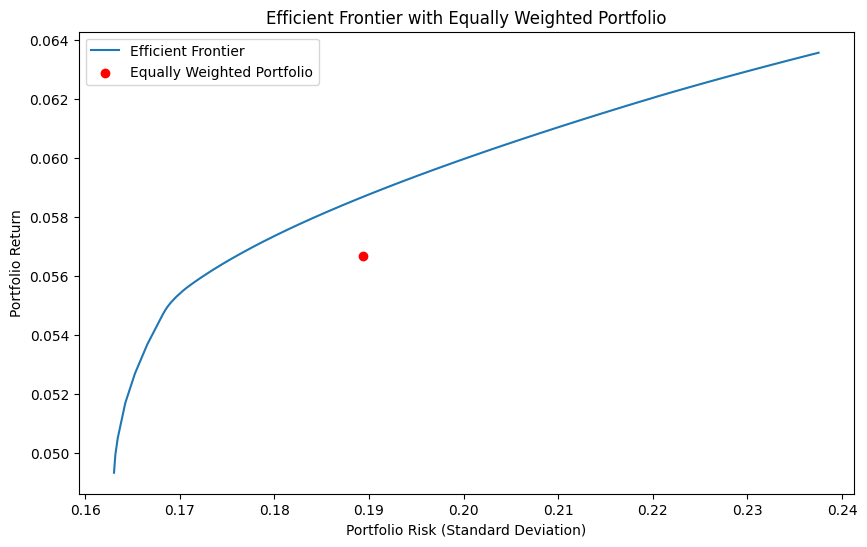

The equally weighted portfolio does not belong to the efficient frontier.


In [ ]:
def portfolio_variance(weights, Sigma):
    return np.dot(weights.T, np.dot(Sigma, weights))

# Compute the efficient frontier
frontier_returns = []
frontier_volatilities = []

for gamma in np.arange(0, 3, 0.05):
    optimal_weights = mean_variance_optimization(mu, Sigma, gamma)
    frontier_returns.append(portfolio_return(optimal_weights, mu))
    frontier_volatilities.append(np.sqrt(portfolio_variance(optimal_weights, Sigma)))

# Equally weighted portfolio
equal_weights = np.ones(len(mu)) / len(mu)
equal_return = portfolio_return(equal_weights, mu)
equal_risk = np.sqrt(portfolio_variance(equal_weights, Sigma))

# Plot the efficient frontier
plt.figure(figsize=(10,6))
plt.plot(frontier_volatilities, frontier_returns, label="Efficient Frontier")
plt.scatter(equal_risk, equal_return, color='red', label="Equally Weighted Portfolio")
plt.xlabel("Portfolio Risk (Standard Deviation)")
plt.ylabel("Portfolio Return")
plt.title("Efficient Frontier with Equally Weighted Portfolio")
plt.legend()
plt.show()

# Output if equally weighted portfolio lies on the efficient frontier
min_diff = min([abs(equal_return - r) for r in frontier_returns])
if min_diff < 1e-6:  #small threshold to determine proximity
    print("The equally weighted portfolio belongs to the efficient frontier.")
else:
    print("The equally weighted portfolio does not belong to the efficient frontier.")

# Capital Market Line (CML)
We compute the capital market line as $E(R_p) = R_f + \frac{E(R_m) - R_f}{\sigma_m} \sigma_p$
- where $\frac{E(R_m) - R_f}{\sigma_m}$ is the tangent slope or sharpe ratio

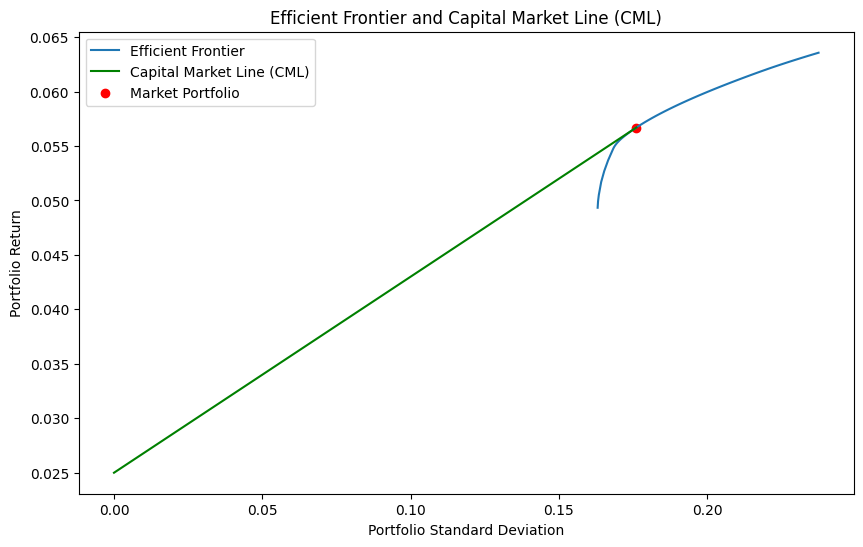

In [ ]:
# Risk-free rate
rf = 0.025

def portfolio_variance(weights, Sigma):
  return np.dot(weights.T, np.dot(Sigma, weights))

# Optimization function for the tangency portfolio (maximizing Sharpe ratio)
def tangency_portfolio(mu, Sigma, rf):
    def objective(weights):
        port_return = portfolio_return(weights, mu)
        port_vol = np.sqrt(portfolio_variance(weights, Sigma))
        return -(port_return - rf) / port_vol  #negative because we are maximizing

    initial_weights = np.ones(len(mu)) / len(mu)
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
    bounds = tuple((0, 1) for asset in range(len(mu)))  #Long-only portfolio

    # Solve the optimization problem
    result = opt.minimize(objective, initial_weights, bounds=bounds, constraints=constraints)
    return result.x

# Compute the market portfolio (tangency portfolio)
market_weights = tangency_portfolio(mu, Sigma, rf)
market_return = portfolio_return(market_weights, mu)
market_volatility = np.sqrt(portfolio_variance(market_weights, Sigma))

# Capital Market Line (CML)
cml_returns = np.linspace(rf, market_return, 100)
cml_volatilities = (cml_returns - rf) / (market_return - rf) * market_volatility

# Plot the efficient frontier and CML
plt.figure(figsize=(10, 6))
plt.plot(frontier_volatilities, frontier_returns, label="Efficient Frontier")
plt.plot(cml_volatilities, cml_returns, label="Capital Market Line (CML)", color='green')
plt.scatter(market_volatility, market_return, color='red', label="Market Portfolio")
plt.xlabel("Portfolio Standard Deviation")
plt.ylabel("Portfolio Return")
plt.title("Efficient Frontier and Capital Market Line (CML)")
plt.legend()
plt.show()

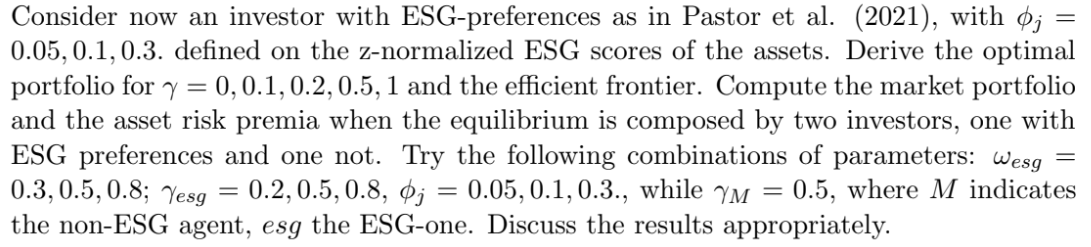

Optimal Portfolio Weights for ESG Investor:

ESG preference parameter φ = 0.05
γ = 0: [0.113 0.    0.    0.887 0.    0.   ], Expected Return: 0.0411, Variance: 0.0303, ESG Score: 0.8330
γ = 0.1: [0.1473 0.     0.     0.8527 0.     0.    ], Expected Return: 0.0415, Variance: 0.0299, ESG Score: 0.8279
γ = 0.2: [0.1866 0.     0.     0.8134 0.     0.    ], Expected Return: 0.0419, Variance: 0.0294, ESG Score: 0.8220
γ = 0.5: [0.2748 0.     0.     0.6799 0.0059 0.0395], Expected Return: 0.0439, Variance: 0.0283, ESG Score: 0.7950
γ = 1: [0.453  0.     0.2012 0.2219 0.     0.1238], Expected Return: 0.0517, Variance: 0.0288, ESG Score: 0.6858

ESG preference parameter φ = 0.1
γ = 0: [0. 0. 0. 1. 0. 0.], Expected Return: 0.0400, Variance: 0.0324, ESG Score: 0.8500
γ = 0.1: [0. 0. 0. 1. 0. 0.], Expected Return: 0.0400, Variance: 0.0324, ESG Score: 0.8500
γ = 0.2: [0. 0. 0. 1. 0. 0.], Expected Return: 0.0400, Variance: 0.0324, ESG Score: 0.8500
γ = 0.5: [0.0274 0.     0.     0.9726 0.     0.    

<module 'matplotlib.pyplot' from 'C:\\Users\\matte\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\matplotlib\\pyplot.py'>

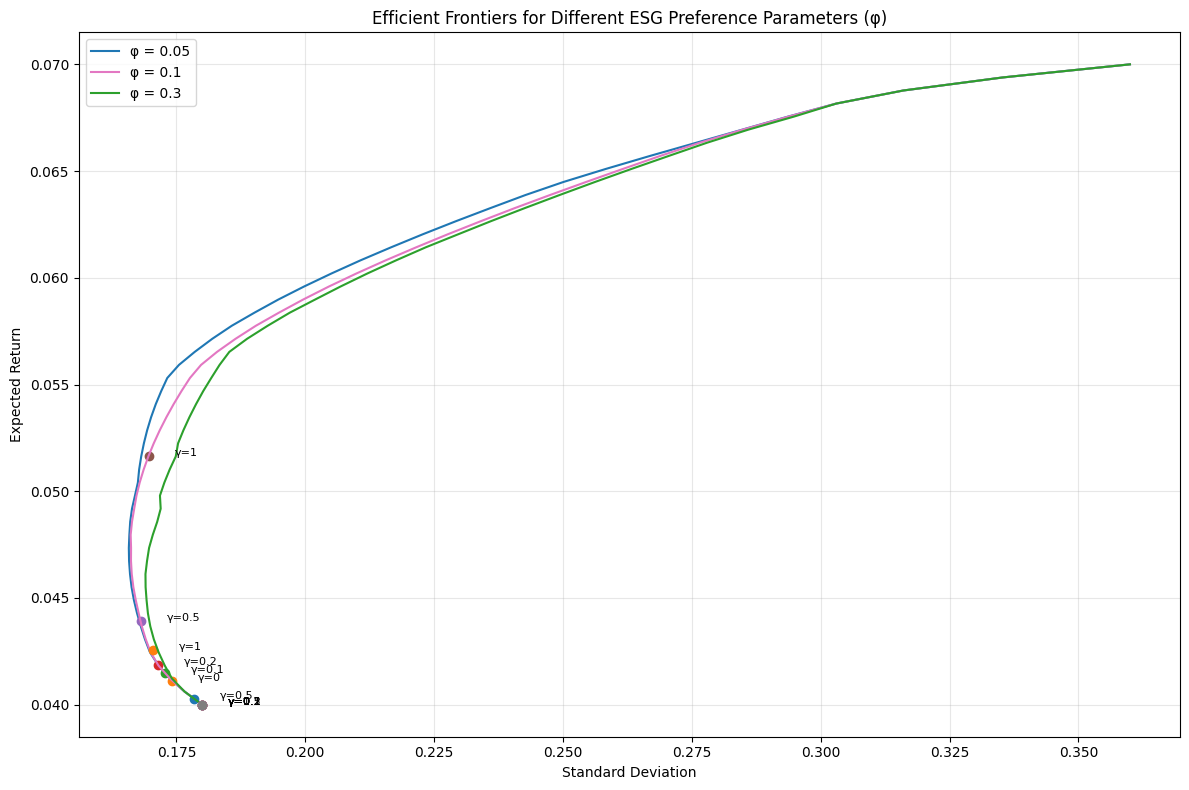

In [ ]:
### Optimal portfolio and efficient frontier for ESG investor

esg_scores = np.array([0.7, 0.4, 0.55, 0.85, 0.45, 0.56])

def portfolio_esg_score(weights, esg_scores):
    return np.dot(weights, esg_scores)

# Optimal portfolio
def mean_variance_esg_optimization(mu, Sigma, esg_scores, gamma, phi):
    n = len(mu)
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
    bounds = tuple((0, 1) for i in range(n))

    def objective(weights):
        return 0.5*portfolio_variance(weights, Sigma) - gamma*portfolio_return(weights, mu) - phi*portfolio_esg_score(weights, esg_scores) #U = w'μ - (γ/2)w'Σw + φw'e

    initial_weights = np.ones(n) / n

    result = opt.minimize(objective, initial_weights, bounds=bounds, constraints=constraints)
    return result.x

phi_values = [0.05, 0.1, 0.3]

optimal_weights_esg = {}
for phi in phi_values:
    optimal_weights_esg[phi] = {}
    for gamma in gamma_values:
        optimal_weights_esg[phi][gamma] = mean_variance_esg_optimization(mu, Sigma, esg_scores, gamma, phi)

# Efficient frontier
def efficient_frontier_points(mu, Sigma, esg_scores, phi, num_points=50):
    target_returns = np.linspace(min(mu), max(mu), num_points)
    frontier_variances = []
    frontier_weights = []
    frontier_esg_scores = []

    constraints = [
        {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
    ]
    bounds = tuple((0, 1) for i in range(len(mu)))

    for target in target_returns:
        constraints_return = constraints.copy()
        constraints_return.append(
            {'type': 'eq', 'fun': lambda weights: portfolio_return(weights, mu) - target}
        )

        def objective(weights):
            # For efficient frontier we minimize variance
            # If phi > 0, we include ESG preference
            var = portfolio_variance(weights, Sigma)
            esg = -phi * portfolio_esg_score(weights, esg_scores) if phi > 0 else 0
            return var + esg

        initial_weights = np.ones(len(mu)) / len(mu)
        try:
            result = opt.minimize(objective, initial_weights, bounds=bounds, constraints=constraints_return)
            if result.success:
                frontier_weights.append(result.x)
                frontier_variances.append(portfolio_variance(result.x, Sigma))
                frontier_esg_scores.append(portfolio_esg_score(result.x, esg_scores))
            else:
                continue
        except:
            continue

    return target_returns[:len(frontier_variances)], frontier_variances, frontier_weights, frontier_esg_scores

# Calculate efficient frontiers for different phi values
efficient_frontiers = {}
for phi in phi_values:
    returns, variances, weights, esg_scores_pf = efficient_frontier_points(mu, Sigma, esg_scores, phi)
    efficient_frontiers[phi] = {
        'returns': returns,
        'variances': variances,
        'weights': weights,
        'esg_scores': esg_scores_pf
    }

# Print results
def print_results():
    # Print optimal portfolio weights
    print("Optimal Portfolio Weights for ESG Investor:")
    for phi in phi_values:
        print(f"\nESG preference parameter φ = {phi}")
        for gamma in gamma_values:
            weights = optimal_weights_esg[phi][gamma]
            print(f"γ = {gamma}: {np.round(weights, 4)}, Expected Return: {portfolio_return(weights, mu):.4f}, Variance: {portfolio_variance(weights, Sigma):.4f}, ESG Score: {portfolio_esg_score(weights, esg_scores):.4f}")

    # Plot efficient frontiers
    plt.figure(figsize=(12, 8))

    for phi in phi_values:
        frontier_data = efficient_frontiers[phi]
        std_devs = np.sqrt(frontier_data['variances'])
        plt.plot(std_devs, frontier_data['returns'], '-', label=f'φ = {phi}')

        # Plot optimal portfolios
        for gamma in gamma_values:
            weights = optimal_weights_esg[phi][gamma]
            std_dev = np.sqrt(portfolio_variance(weights, Sigma))
            ret = portfolio_return(weights, mu)
            plt.plot(std_dev, ret, 'o', markersize=6)
            plt.text(std_dev+0.005, ret, f'γ={gamma}', fontsize=8)

    plt.xlabel('Standard Deviation')
    plt.ylabel('Expected Return')
    plt.title('Efficient Frontiers for Different ESG Preference Parameters (φ)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    return plt

print_results()


In [ ]:
### Market equilibrium with ESG and non-ESG investors

def market_equilibrium(mu, Sigma, esg_scores, omega_esg, gamma_esg, phi, gamma_M):
    # Optimal portfolio for ESG investor
    weights_esg = mean_variance_esg_optimization(mu, Sigma, esg_scores, gamma_esg, phi)

    # Optimal portfolio for non-ESG investor (phi = 0)
    weights_non_esg = mean_variance_esg_optimization(mu, Sigma, esg_scores, gamma_M, 0)

    # Market portfolio (weighted average of the two investors)
    market_portfolio = omega_esg * weights_esg + (1 - omega_esg) * weights_non_esg

    # Asset risk premia
    portfolio_variance = np.dot(market_portfolio.T, np.dot(Sigma, market_portfolio))
    risk_premia = mu - gamma_M * portfolio_variance

    return market_portfolio, risk_premia, weights_esg, weights_non_esg

# Calculate market portfolios for different parameter combinations
omega_values = [0.3, 0.5, 0.8]
gamma_esg_values = [0.2, 0.5, 0.8]
phi_values = [0.05, 0.1, 0.3]
gamma_M = 0.5

equilibrium_results = {}
for omega in omega_values:
    equilibrium_results[omega] = {}
    for gamma_esg in gamma_esg_values:
        equilibrium_results[omega][gamma_esg] = {}
        for phi in phi_values:
            market_portfolio, risk_premia, weights_esg, weights_non_esg = market_equilibrium(
                mu, Sigma, esg_scores, omega, gamma_esg, phi, gamma_M)

            equilibrium_results[omega][gamma_esg][phi] = {
                'market_portfolio': market_portfolio,
                'risk_premia': risk_premia,
                'weights_esg': weights_esg,
                'weights_non_esg': weights_non_esg
            }

# Display market equilibrium results
def print_market_results():
    print("\nMarket Equilibrium Results:")
    omega, gamma_esg, phi = 0.5, 0.5, 0.1
    result = equilibrium_results[omega][gamma_esg][phi]

    print(f"Parameters: ω_esg = {omega}, γ_esg = {gamma_esg}, φ = {phi}, γ_M = {gamma_M}")
    print(f"Market Portfolio: {np.round(result['market_portfolio'], 4)}")
    print(f"Expected Return: {portfolio_return(result['market_portfolio'], mu):.4f}")
    print(f"Variance: {portfolio_variance(result['market_portfolio'], Sigma):.4f}")
    print(f"ESG Score: {portfolio_esg_score(result['market_portfolio'], esg_scores):.4f}")
    print(f"Risk Premia: {np.round(result['risk_premia'], 4)}")

# Execute the results printing
print_market_results()



Market Equilibrium Results:
Parameters: ω_esg = 0.5, γ_esg = 0.5, φ = 0.1, γ_M = 0.5
Market Portfolio: [0.1912 0.1421 0.1587 0.4863 0.     0.0217]
Expected Return: 0.0478
Variance: 0.0272
ESG Score: 0.7035
Risk Premia: [0.0364 0.0414 0.0464 0.0264 0.0564 0.0514]


Conclusions:
The market equilibrium results show a balanced portfolio with moderate risk (variance of 0.0272) and a relatively good ESG alignment (ESG score of 0.7035). The expected return of 4.78% aligns with the mix of ESG and non-ESG assets. The risk premia values (ranging from 0.0264 to 0.0564) reflect the compensation for risk taken on by investors, with higher premia indicating greater expected returns for higher-risk assets.

# Engineer and backtest an ESG-investment strategy.
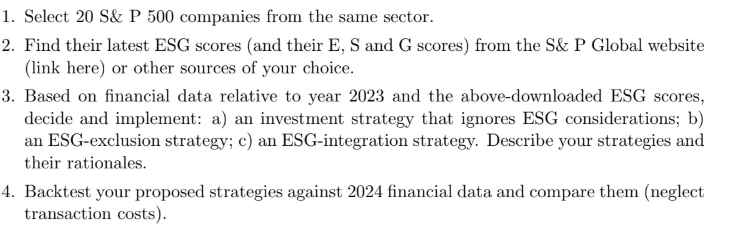

For this part of assignement, we had randomly choose 20 companies of the S&P 500 index, in particular 20 companies of Information Technology:

1. **GLW (Corning Inc.)**  
   Produces advanced glass and ceramic components, classified as electronic components within the tech sector.

2. **TER (Teradyne)**  
   Builds semiconductor testing equipment and automation solutions, ensuring chip quality and reliability.

3. **TEL (TE Connectivity)**  
   Specializes in connectors, sensors, and electronic components for automotive, industrial, and communications.

4. **CDW**  
   A tech distributor providing hardware, software, and integrated IT solutions to various sectors.

5. **ROP (Roper Technologies)**  
   Develops software and engineered products for markets like healthcare, transportation, and manufacturing.

6. **AKAM (Akamai Technologies)**  
   Offers content delivery network (CDN) and cybersecurity services, ensuring fast and secure online experiences.

7. **FTNT (Fortinet)**  
   A cybersecurity firm focusing on network security and systems software for enterprises and service providers.

8. **VRSN (Verisign)**  
   Manages top-level domains (like .com) and provides internet infrastructure and security services.

9. **ADI (Analog Devices)**  
   Creates integrated circuits for analog and digital signal processing, vital in industrial and automotive electronics.

10. **MSI (Motorola Solutions)**  
    Provides communications equipment and security solutions, including radios and command-center software.

11. **CRM (Salesforce)**  
    A leader in cloud-based CRM software, helping companies manage sales, marketing, and customer support.

12. **ANSS (Ansys)**  
    Offers engineering simulation software, enabling virtual testing in aerospace, automotive, and electronics.

13. **JNPR (Juniper Networks)**  
    Supplies network routers, switches, and software, helping build secure, high-performance networks.

14. **AMAT (Applied Materials)**  
    Produces equipment for semiconductor and display manufacturing, crucial in chip production.

15. **NOW (ServiceNow)**  
    Provides cloud-based workflow and automation software for IT service and enterprise operations.

16. **ADSK (Autodesk)**  
    Develops 3D design and engineering software widely used in architecture, construction, and media.

17. **NXPI (NXP Semiconductors)**  
    Focuses on secure connectivity and embedded solutions for automotive, industrial, and mobile markets.

18. **INTU (Intuit)**  
    Known for financial and tax software like QuickBooks and TurboTax, serving consumers and small businesses.

19. **SNPS (Synopsys)**  
    Offers electronic design automation (EDA) software for designing and verifying complex semiconductor chips.

20. **MU (Micron Technology)**  
    Specializes in memory and storage (DRAM, NAND flash), used in PCs, servers, mobile devices, and automotive.


# Importing dataset

In [ ]:
price_file_path = "sp500_price_data.csv"
esg_file_path = "sp500_esg_data.csv"

# Load the full Price dataset
price_df = pd.read_csv(price_file_path, parse_dates=["Date"], index_col="Date")
print("Full Price Dataset:")
display(price_df)

# Define the selected tickers list
selected_tickers = [
    'GLW', 'TER', 'TEL', 'CDW', 'ROP', 'AKAM', 'FTNT', 'VRSN',
    'ADI', 'MSI', 'CRM', 'ANSS', 'JNPR', 'AMAT', 'NOW', 'ADSK',
    'NXPI', 'INTU', 'SNPS', 'MU'
]

# Subset the Price dataset for the selected tickers
price_subset = price_df[selected_tickers]
print("Price Dataset for Selected Tickers:")
display(price_subset)

# Load the full ESG dataset
esg_df = pd.read_csv(esg_file_path)
print("Full ESG Dataset:")
display(esg_df)

# Subset the ESG dataset for the selected tickers (assuming the column 'Symbol' holds the ticker)
esg_subset = esg_df[esg_df['Symbol'].isin(selected_tickers)]
print("ESG Dataset for Selected Tickers:")
display(esg_subset)

Full Price Dataset:


,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WRB,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03 00:00:00+00:00,150.039993,12.74,125.070000,162.380005,109.580002,62.459999,270.260010,336.920013,162.449997,89.650002,...,48.386665,245.179993,30.860001,85.610001,70.070000,106.510002,110.760002,126.959999,127.279999,146.850006
2023-01-04 00:00:00+00:00,151.669998,13.59,126.360001,163.690002,111.209999,62.770000,269.339996,341.410004,165.910004,86.389999,...,48.226665,246.490005,31.230000,90.900002,70.669998,106.820000,110.589996,128.679993,128.460007,148.960007
2023-01-05 00:00:00+00:00,152.110001,13.99,125.019997,163.490005,110.800003,62.939999,262.980011,328.440002,159.690002,84.230003,...,47.919998,246.440002,30.299999,91.339996,69.239998,109.209999,107.449997,127.699997,126.080002,145.449997
2023-01-06 00:00:00+00:00,147.669998,14.18,129.619995,166.550003,112.330002,63.900002,269.209991,332.750000,165.520004,85.949997,...,49.526669,253.429993,31.610001,93.570000,71.290001,110.529999,111.269997,130.289993,125.699997,147.639999
2023-01-09 00:00:00+00:00,147.470001,14.61,130.149994,161.660004,112.150002,62.669998,273.750000,341.980011,167.100006,85.370003,...,48.653332,255.059998,31.420000,94.330002,71.980003,108.470001,111.790001,129.759995,126.050003,147.059998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26 00:00:00+00:00,140.490005,10.21,227.179993,197.440002,112.699997,109.489998,336.779999,559.440002,225.610001,60.740002,...,58.299999,285.399994,31.080000,77.239998,61.459999,118.809998,136.250000,134.949997,114.629997,181.559998
2024-08-27 00:00:00+00:00,141.100006,10.17,228.029999,195.919998,113.099998,110.680000,340.380005,567.820007,231.839996,60.560001,...,58.709999,288.040009,30.600000,77.040001,60.889999,117.680000,135.419998,134.500000,114.669998,182.100006
2024-08-28 00:00:00+00:00,141.059998,10.15,226.490005,195.399994,112.900002,111.010002,337.390015,560.539978,227.169998,60.959999,...,58.730000,289.470001,30.639999,75.300003,60.680000,116.519997,135.820007,135.649994,114.190002,182.910004


Price Dataset for Selected Tickers:


,GLW,TER,TEL,CDW,ROP,AKAM,FTNT,VRSN,ADI,MSI,CRM,ANSS,JNPR,AMAT,NOW,ADSK,NXPI,INTU,SNPS,MU
Date,,,,,,,,,,,,,,,,,,,,
2023-01-03 00:00:00+00:00,32.540001,85.930000,114.660004,179.509995,434.459991,84.970001,48.520000,201.919998,162.449997,257.399994,134.779999,238.639999,32.529999,96.730003,385.500000,185.149994,155.050003,391.179993,319.679993,50.369999
2023-01-04 00:00:00+00:00,34.110001,87.419998,117.620003,181.149994,442.739990,85.860001,48.299999,205.559998,165.910004,258.019989,139.589996,242.940002,31.830000,99.309998,393.850006,187.960007,157.960007,391.570007,320.929993,54.200001
2023-01-05 00:00:00+00:00,34.389999,87.120003,116.260002,178.059998,435.920013,84.620003,47.450001,200.039993,159.690002,255.119995,136.339996,231.649994,31.170000,97.919998,366.320007,182.070007,153.509995,375.619995,315.040009,54.709999
2023-01-06 00:00:00+00:00,35.380001,91.239998,120.400002,183.220001,443.670013,85.849998,48.689999,205.309998,165.520004,263.839996,140.509995,239.410004,31.950001,104.269997,366.529999,187.190002,159.630005,386.519989,320.540009,56.770000
2023-01-09 00:00:00+00:00,35.419998,93.209999,121.410004,183.960007,443.410004,86.879997,49.410000,208.250000,167.100006,260.609985,147.100006,247.990005,31.830000,106.489998,378.559998,192.470001,160.970001,395.339996,325.950012,56.360001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26 00:00:00+00:00,42.220001,133.000000,152.539993,229.309998,546.729980,100.989998,75.180000,181.500000,225.610001,430.230011,265.279999,319.459991,38.869999,196.229996,827.859985,256.209991,249.839996,617.119995,525.909973,98.910004
2024-08-27 00:00:00+00:00,42.520000,134.979996,151.869995,226.990005,551.200012,101.309998,75.970001,181.740005,231.839996,432.359985,264.200012,318.410004,38.849998,195.770004,831.739990,256.989990,252.729996,626.320007,521.780029,97.860001
2024-08-28 00:00:00+00:00,42.320000,132.309998,151.240005,224.500000,550.330017,100.080002,75.610001,181.190002,227.169998,435.209991,258.899994,315.600006,38.820000,192.889999,814.109985,254.619995,246.910004,617.039978,509.980011,94.860001


Full ESG Dataset:


,Symbol,Full Name,GICS Sector,GICS Sub-Industry,environmentScore,socialScore,governanceScore,totalEsg,highestControversy,percentile,ratingYear,ratingMonth,marketCap,beta,overallRisk
0,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,1.12,6.42,6.10,13.64,2.0,7.98,2023.0,9.0,39751831552,1.054,8
1,AAL,American Airlines Group,Industrials,Passenger Airlines,9.94,11.65,4.76,26.35,2.0,54.48,2023.0,9.0,7335383552,1.433,10
2,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",0.46,7.39,9.37,17.22,3.0,17.82,2023.0,9.0,3296096681984,1.240,1
3,ABBV,AbbVie,Health Care,Biotechnology,2.38,17.19,10.36,29.93,3.0,68.62,2023.0,9.0,341698445312,0.619,6
4,ABT,Abbott Laboratories,Health Care,Health Care Equipment,2.27,14.24,8.33,24.83,3.0,48.27,2023.0,9.0,205534380032,0.722,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,XOM,ExxonMobil,Energy,Integrated Oil & Gas,23.11,10.01,8.48,41.60,3.0,93.17,2023.0,9.0,507282325504,0.878,7
422,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,4.27,8.66,5.19,18.13,1.0,20.92,2023.0,9.0,32338771968,1.037,3
423,YUM,Yum! Brands,Consumer Discretionary,Restaurants,4.53,11.45,4.12,20.10,2.0,28.34,2023.0,9.0,37833572352,1.081,2
424,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,3.60,14.52,7.89,26.02,2.0,53.22,2023.0,9.0,21635987456,1.026,2


ESG Dataset for Selected Tickers:


,Symbol,Full Name,GICS Sector,GICS Sub-Industry,environmentScore,socialScore,governanceScore,totalEsg,highestControversy,percentile,ratingYear,ratingMonth,marketCap,beta,overallRisk
8,ADI,Analog Devices,Information Technology,Semiconductors,9.27,6.68,6.98,22.92,1.0,39.70,2023.0,9.0,111884697600,1.073,9
11,ADSK,Autodesk,Information Technology,Application Software,3.68,8.19,4.89,16.76,0.0,16.44,2023.0,9.0,57698152448,1.476,2
19,AKAM,Akamai Technologies,Information Technology,Internet Services & Infrastructure,3.00,7.09,6.93,17.01,1.0,17.19,2023.0,9.0,15044968448,0.676,3
23,AMAT,Applied Materials,Information Technology,Semiconductor Materials & Equipment,4.49,2.97,5.28,12.74,1.0,6.15,2023.0,9.0,155474345984,1.541,1
30,ANSS,Ansys,Information Technology,Application Software,3.51,7.32,5.07,15.89,0.0,13.72,2023.0,9.0,27723399168,1.114,2
75,CDW,CDW,Information Technology,Technology Distributors,2.48,3.21,3.52,9.21,0.0,2.18,2023.0,9.0,29830193152,1.033,3
101,CRM,Salesforce,Information Technology,Application Software,2.01,7.48,5.39,14.88,1.0,10.87,2023.0,9.0,243961643008,1.297,9
166,FTNT,Fortinet,Information Technology,Systems Software,2.50,10.03,6.37,18.90,1.0,23.77,2023.0,9.0,58393071616,0.998,6
174,GLW,Corning Inc.,Information Technology,Electronic Components,5.53,4.81,6.13,16.48,2.0,15.51,2023.0,9.0,37051850752,1.036,7
207,INTU,Intuit,Information Technology,Application Software,0.97,10.70,4.73,16.41,2.0,15.32,2023.0,9.0,181138964480,1.243,2


# Mean Variance Portfolio Without ESG scores



Markowitz Mean-Variance Portfolio Model on Risk and Return


Using data from 2023-01-03 00:00:00+00:00 to 2023-12-29 00:00:00+00:00 (Total days: 360)


Tickers used for analysis: ['GLW', 'TER', 'TEL', 'CDW', 'ROP', 'AKAM', 'FTNT', 'VRSN', 'ADI', 'MSI', 'CRM', 'ANSS', 'JNPR', 'AMAT', 'NOW', 'ADSK', 'NXPI', 'INTU', 'SNPS', 'MU']




Annualized return of the optimized portfolio: 79.80%
Annualized volatility of the optimized portfolio: 23.42%
Sharpe Ratio: 3.36




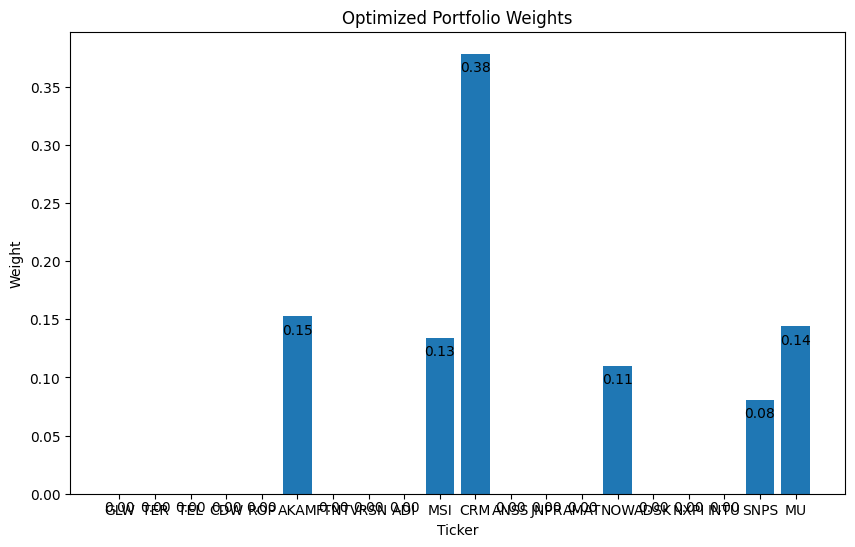



Optimized Weights:
GLW: 0.00
TER: 0.00
TEL: 0.00
CDW: 0.00
ROP: 0.00
AKAM: 0.15
FTNT: 0.00
VRSN: 0.00
ADI: 0.00
MSI: 0.13
CRM: 0.38
ANSS: 0.00
JNPR: 0.00
AMAT: 0.00
NOW: 0.11
ADSK: 0.00
NXPI: 0.00
INTU: 0.00
SNPS: 0.08
MU: 0.14




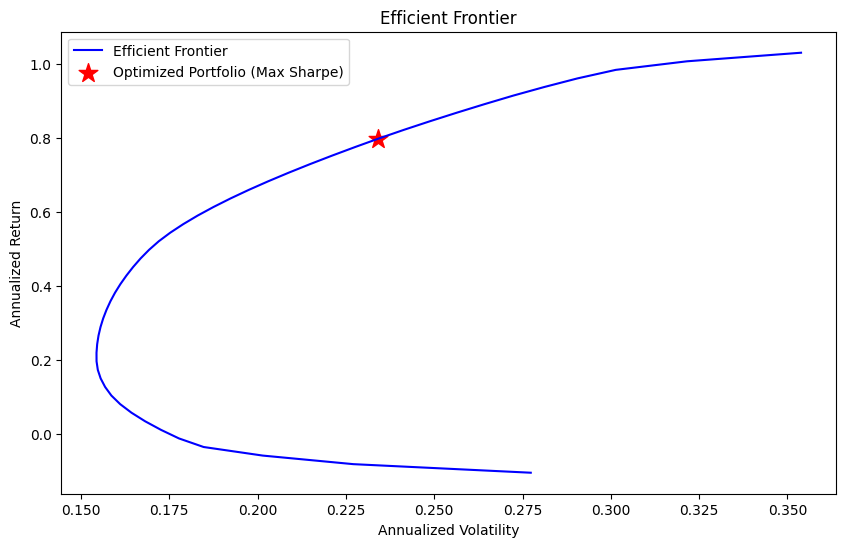

In [ ]:
separator = "\n" + "="*50 + "\n"

print(separator)
print("Markowitz Mean-Variance Portfolio Model on Risk and Return")
print(separator)

#path
adj_close = pd.read_csv(
    price_file_path,
    parse_dates=["Date"],
    index_col="Date"
)
adj_close.sort_index(inplace=True)

# Filter data for 2023 only
adj_close = adj_close.loc["2023-01-01":"2023-12-31"]

# Automatically determine the full date range from the dataset
start_date = adj_close.index.min()
end_date = adj_close.index.max()
num_days = (end_date - start_date).days

print(f"Using data from {start_date} to {end_date} (Total days: {num_days})")
print(separator)


selected_tickers = ['GLW', 'TER', 'TEL', 'CDW', 'ROP', 'AKAM', 'FTNT', 'VRSN', 'ADI',
                      'MSI', 'CRM', 'ANSS', 'JNPR', 'AMAT', 'NOW', 'ADSK', 'NXPI',
                      'INTU', 'SNPS', 'MU']

# Check which tickers are available in the price dataset
missing_tickers = [t for t in selected_tickers if t not in adj_close.columns]
if missing_tickers:
    print(f"WARNING: The following tickers are not in the price dataset: {missing_tickers}")

tickers = [t for t in selected_tickers if t in adj_close.columns]
if len(tickers) == 0:
    raise ValueError("No tickers from the selected list were found in the price dataset.")

adj_close = adj_close[tickers]

print(f"Tickers used for analysis: {tickers}")
print(separator)

returns = adj_close.pct_change().dropna()


#Define Functions for Portfolio Performance and Optimization

def portfolio_performance(weights, returns, days):
    """
    Calculate the annualized portfolio return and volatility.
    """
    mean_daily_return = returns.mean()
    port_return = np.sum(mean_daily_return * weights) * days
    port_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * days, weights)))
    return port_return, port_vol

def negative_sharpe_ratio(weights, returns, days, risk_free_rate=0.0):
    """
    Returns the negative Sharpe ratio (to be minimized).
    """
    ret, vol = portfolio_performance(weights, returns, days)
    sharpe = (ret - risk_free_rate) / vol
    return -sharpe

def optimize_portfolio(returns, days, risk_free_rate=0.0):
    """
    Optimize portfolio weights to maximize the Sharpe ratio.
    """
    num_assets = len(returns.columns)
    initial_weights = np.array([1.0 / num_assets] * num_assets)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(num_assets))

    result = minimize(
        fun=negative_sharpe_ratio,
        x0=initial_weights,
        args=(returns, days, risk_free_rate),
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    return result


#Optimize the Portfolio (Maximizing Sharpe Ratio)

risk_free_rate = 0.01
opt_result = optimize_portfolio(returns, num_days, risk_free_rate)
optimized_weights = opt_result.x

port_return, port_vol = portfolio_performance(optimized_weights, returns, num_days)

print(separator)
print(f"Annualized return of the optimized portfolio: {port_return*100:.2f}%")
print(f"Annualized volatility of the optimized portfolio: {port_vol*100:.2f}%")
print(f"Sharpe Ratio: {(port_return - risk_free_rate) / port_vol:.2f}")
print(separator)


#Plot Optimized Weights

plt.figure(figsize=(10,6))
plt.bar(tickers, optimized_weights)
plt.xlabel("Ticker")
plt.ylabel("Weight")
plt.title("Optimized Portfolio Weights")
for i, weight in enumerate(optimized_weights):
    plt.annotate(f"{weight:.2f}", xy=(i, weight), xycoords='data',
                 xytext=(0, -5), textcoords='offset points', ha='center', va='top', fontsize=10)
plt.show()

print(separator)
print("Optimized Weights:")
for ticker, weight in zip(tickers, optimized_weights):
    print(f"{ticker}: {weight:.2f}")
print(separator)

def minimize_variance_given_target(target, returns, days):
    num_assets = len(returns.columns)
    mean_daily_return = returns.mean()

    def objective(weights):
        return np.dot(weights.T, np.dot(returns.cov() * days, weights))

    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: np.sum(mean_daily_return * x) * days - target}
    ]
    bounds = tuple((0, 1) for _ in range(num_assets))
    initial_guess = np.array([1/num_assets] * num_assets)

    result = minimize(
        fun=objective,
        x0=initial_guess,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    return result

mean_daily_return = returns.mean()
min_target = np.min(mean_daily_return) * num_days
max_target = np.max(mean_daily_return) * num_days

target_returns = np.linspace(min_target, max_target, 50)
efficient_vols = []
efficient_rets = []

for target in target_returns:
    res = minimize_variance_given_target(target, returns, num_days)
    if res.success:
        w = res.x
        ret, vol = portfolio_performance(w, returns, num_days)
        efficient_rets.append(ret)
        efficient_vols.append(vol)
    else:
        efficient_rets.append(np.nan)
        efficient_vols.append(np.nan)

plt.figure(figsize=(10,6))
plt.plot(efficient_vols, efficient_rets, 'b-', label='Efficient Frontier')
plt.scatter(port_vol, port_return, color='red', marker='*', s=200, label='Optimized Portfolio (Max Sharpe)')
plt.xlabel("Annualized Volatility")
plt.ylabel("Annualized Return")
plt.title("Efficient Frontier")
plt.legend()
plt.show()

The results are in line with the classical mean-variance algorithm. Under the Mean Variance framework, the optimizer seeks to maximize the portfolios Sharpe ratio by balancing expected returns against risk and diversification benefits. With the no short-selling constraint, the optimization often leads to a "corner solution" where only the assets that contribute positively to the risk-return tradeoff are included in the portfolio. Assets that either have relatively lower expected returns, higher risk, or do not improve diversification are excluded.

# ESG-exclusion investment strategy

In [ ]:
TRADING_DAYS = 252  # trading days per year
ESG_THRESHOLD = 0.5  # Soglia per il punteggio ESG normalizzato

#path
price_df = pd.read_csv(price_file_path, parse_dates=["Date"], index_col="Date")
price_df.sort_index(inplace=True)

price_df = price_df.loc["2023-01-01":"2023-12-31"]

start_date = price_df.index.min()
end_date = price_df.index.max()
num_days = (end_date - start_date).days
print(f"Using price data from {start_date.date()} to {end_date.date()} (Total days: {num_days})")

#path
df_esg = pd.read_csv(esg_file_path)

fixed_tickers = ['GLW', 'TER', 'TEL', 'CDW', 'ROP', 'AKAM', 'FTNT', 'VRSN',
                 'ADI', 'MSI', 'CRM', 'ANSS', 'JNPR', 'AMAT', 'NOW', 'ADSK',
                 'NXPI', 'INTU', 'SNPS', 'MU']

df_esg_fixed = df_esg[df_esg['Symbol'].isin(fixed_tickers)].copy()
if df_esg_fixed.empty:
    raise ValueError('None of the fixed tickers were found in the ESG dataset.')

df_esg_fixed.sort_values('Symbol', inplace=True)
df_esg_fixed.reset_index(drop=True, inplace=True)

min_esg = df_esg_fixed['totalEsg'].min()
max_esg = df_esg_fixed['totalEsg'].max()
df_esg_fixed['normalized_ESG'] = (df_esg_fixed['totalEsg'] - min_esg) / (max_esg - min_esg)

print("Fixed ESG Data (with normalized ESG scores):")
display(df_esg_fixed[['Symbol', 'totalEsg', 'normalized_ESG']])

df_esg_exclusion = df_esg_fixed[df_esg_fixed['normalized_ESG'] >= ESG_THRESHOLD]
print(f"Stocks that pass ESG exclusion (normalized_ESG >= {ESG_THRESHOLD}):")
display(df_esg_exclusion[['Symbol', 'normalized_ESG']])

# Crea la lista dei ticker che superano il filtro ESG e che sono presenti nei dati di prezzo
selected_tickers = df_esg_exclusion['Symbol'].tolist()
selected_tickers = [t for t in selected_tickers if t in price_df.columns]
print("Selected tickers after ESG exclusion:", selected_tickers)

price_df = price_df[selected_tickers]

returns_daily = price_df.pct_change().dropna()
mu_annual = returns_daily.mean() * TRADING_DAYS
Sigma_annual = returns_daily.cov() * TRADING_DAYS

print("\nAnnualized Expected Returns (historical) for ESG-exclusion portfolio:")
print(mu_annual)
print("\nAnnualized Covariance Matrix for ESG-exclusion portfolio:")
print(Sigma_annual)

# Construct an Equally Weighted Portfolio (ESG-Exclusion)
num_assets = len(selected_tickers)
w_equal = np.ones(num_assets) / num_assets  # Peso uguale per ogni asset

df_weights_equal = pd.DataFrame({'Ticker': selected_tickers, 'Equal_Weight': w_equal})
print("-" * 80)
print("Equal-Weighted ESG-Exclusion Portfolio:")
display(df_weights_equal)


# 7. Evaluate Portfolio Performance

def portfolio_performance(weights, mu, Sigma):
    port_return = np.dot(weights, mu)
    port_vol = np.sqrt(np.dot(weights.T, np.dot(Sigma, weights)))
    return port_return, port_vol

port_return_equal, port_vol_equal = portfolio_performance(w_equal, mu_annual, Sigma_annual)
print(f"Equal-Weighted Portfolio Annualized Return: {port_return_equal*100:.2f}%")
print(f"Equal-Weighted Portfolio Annualized Volatility: {port_vol_equal*100:.2f}%")
print(f"Equal-Weighted Portfolio Sharpe Ratio: {(port_return_equal/port_vol_equal):.2f}")

Using price data from 2023-01-03 to 2023-12-29 (Total days: 360)
Fixed ESG Data (with normalized ESG scores):


,Symbol,totalEsg,normalized_ESG
0,ADI,22.92,1.000000
1,ADSK,16.76,0.550693
2,AKAM,17.01,0.568928
3,AMAT,12.74,0.257476
4,ANSS,15.89,0.487236
5,CDW,9.21,0.000000
6,CRM,14.88,0.413567
7,FTNT,18.90,0.706783
8,GLW,16.48,0.530270
9,INTU,16.41,0.525164


Stocks that pass ESG exclusion (normalized_ESG >= 0.5):


,Symbol,normalized_ESG
0,ADI,1.000000
1,ADSK,0.550693
2,AKAM,0.568928
7,FTNT,0.706783
8,GLW,0.530270
9,INTU,0.525164
12,MU,0.654267
13,NOW,0.538293
14,NXPI,0.775346
15,ROP,0.819110


Selected tickers after ESG exclusion: ['ADI', 'ADSK', 'AKAM', 'FTNT', 'GLW', 'INTU', 'MU', 'NOW', 'NXPI', 'ROP', 'TER', 'VRSN']

Annualized Expected Returns (historical) for ESG-exclusion portfolio:
ADI     0.237398
ADSK    0.326651
AKAM    0.364067
FTNT    0.278142
GLW    -0.042142
INTU    0.517416
MU      0.598707
NOW     0.663576
NXPI    0.448186
ROP     0.241822
TER     0.287925
VRSN    0.038139
dtype: float64

Annualized Covariance Matrix for ESG-exclusion portfolio:
           ADI      ADSK      AKAM      FTNT       GLW      INTU        MU  \
ADI   0.068616  0.041561  0.009055  0.032695  0.026243  0.040709  0.042567   
ADSK  0.041561  0.097361  0.030052  0.038966  0.026013  0.051302  0.038679   
AKAM  0.009055  0.030052  0.057193  0.014325  0.014301  0.024211  0.016663   
FTNT  0.032695  0.038966  0.014325  0.163521  0.015254  0.040528  0.024297   
GLW   0.026243  0.026013  0.014301  0.015254  0.050238  0.020664  0.031606   
INTU  0.040709  0.051302  0.024211  0.040528  0.020664 

,Ticker,Equal_Weight
0,ADI,0.083333
1,ADSK,0.083333
2,AKAM,0.083333
3,FTNT,0.083333
4,GLW,0.083333
5,INTU,0.083333
6,MU,0.083333
7,NOW,0.083333
8,NXPI,0.083333
9,ROP,0.083333


Equal-Weighted Portfolio Annualized Return: 33.00%
Equal-Weighted Portfolio Annualized Volatility: 18.95%
Equal-Weighted Portfolio Sharpe Ratio: 1.74


The Equal-Weighted ESG-Exclusion portfolio consists of 12 stocks with a normalized ESG score of 0.5 or higher. Each stock is given an equal weight of 8.33%. The portfolio yielded an annualized return of 33.00%, with a volatility of 18.95% and a Sharpe ratio of 1.74, indicating a strong risk-adjusted return. The equal-weight strategy was chosen for its simplicity and to reduce dependence on potentially noisy estimates. The performance reflects the successful application of the ESG-exclusion filter

# ESG Integration Investment Strategy
Using the Pedersen-Fitzgibbons-Pomorski model

Using price data from 2023-01-03 to 2023-12-29 (Total days: 360)
Fixed ESG Data (with normalized ESG scores):


,Symbol,totalEsg,normalized_ESG
0,ADI,22.92,1.000000
1,ADSK,16.76,0.550693
2,AKAM,17.01,0.568928
3,AMAT,12.74,0.257476
4,ANSS,15.89,0.487236
5,CDW,9.21,0.000000
6,CRM,14.88,0.413567
7,FTNT,18.90,0.706783
8,GLW,16.48,0.530270
9,INTU,16.41,0.525164


Tickers used for analysis: ['GLW', 'TER', 'TEL', 'CDW', 'ROP', 'AKAM', 'FTNT', 'VRSN', 'ADI', 'MSI', 'CRM', 'ANSS', 'JNPR', 'AMAT', 'NOW', 'ADSK', 'NXPI', 'INTU', 'SNPS', 'MU']

Annualized Expected Returns (historical):
GLW    -0.042142
TER     0.287925
TEL     0.228218
CDW     0.269060
ROP     0.241822
AKAM    0.364067
FTNT    0.278142
VRSN    0.038139
ADI     0.237398
MSI     0.216171
CRM     0.720900
ANSS    0.476334
JNPR   -0.072625
AMAT    0.579806
NOW     0.663576
ADSK    0.326651
NXPI    0.448186
INTU    0.517416
SNPS    0.520031
MU      0.598707
dtype: float64

Annualized Covariance Matrix:
           GLW       TER       TEL       CDW       ROP      AKAM      FTNT  \
GLW   0.050238  0.036882  0.029029  0.024842  0.011179  0.014301  0.015254   
TER   0.036882  0.104360  0.047498  0.033471  0.018618  0.023663  0.037648   
TEL   0.029029  0.047498  0.045192  0.024167  0.015313  0.016138  0.022796   
CDW   0.024842  0.033471  0.024167  0.058504  0.012540  0.012861  0.019724   
ROP 

,Ticker,Optimized_Weight
0,GLW,3.961625e-17
1,TER,0.000000e+00
2,TEL,5.810061e-16
3,CDW,0.000000e+00
4,ROP,1.841887e-02
5,AKAM,1.552954e-01
6,FTNT,2.510254e-16
7,VRSN,1.284588e-16
8,ADI,0.000000e+00
9,MSI,1.365855e-01


--------------------------------------------------------------------------------
Optimized Portfolio Annualized Return: 54.89%
Optimized Portfolio Annualized Volatility: 19.26%
Optimized Portfolio Sharpe Ratio (assuming risk-free rate = 0): 2.85
--------------------------------------------------------------------------------


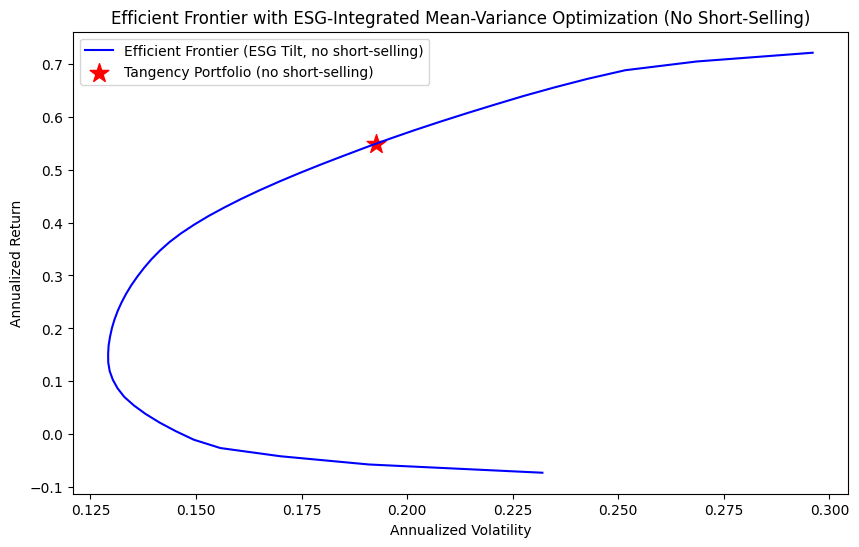

Sum of Optimized Portfolio Weights (should be 1): 1.0000000000000022


In [ ]:
TRADING_DAYS = 252
zeta = 0.01

#path
price_df = pd.read_csv(price_file_path, parse_dates=["Date"], index_col="Date")
price_df.sort_index(inplace=True)


price_df = price_df.loc["2023-01-01":"2023-12-31"]

start_date = price_df.index.min()
end_date = price_df.index.max()
num_days = (end_date - start_date).days
print(f"Using price data from {start_date.date()} to {end_date.date()} (Total days: {num_days})")

#path
df_esg = pd.read_csv(esg_file_path)

fixed_tickers = ['GLW', 'TER', 'TEL', 'CDW', 'ROP', 'AKAM', 'FTNT', 'VRSN',
                 'ADI', 'MSI', 'CRM', 'ANSS', 'JNPR', 'AMAT', 'NOW', 'ADSK',
                 'NXPI', 'INTU', 'SNPS', 'MU']

df_esg_fixed = df_esg[df_esg['Symbol'].isin(fixed_tickers)].copy()

df_esg_fixed.sort_values('Symbol', inplace=True)
df_esg_fixed.reset_index(drop=True, inplace=True)

min_esg = df_esg_fixed['totalEsg'].min()
max_esg = df_esg_fixed['totalEsg'].max()
df_esg_fixed['normalized_ESG'] = (df_esg_fixed['totalEsg'] - min_esg) / (max_esg - min_esg)

print("Fixed ESG Data (with normalized ESG scores):")
display(df_esg_fixed[['Symbol', 'totalEsg', 'normalized_ESG']])

missing_in_price = [t for t in fixed_tickers if t not in price_df.columns]

tickers = [t for t in fixed_tickers if t in price_df.columns]

price_df = price_df[tickers]
print(f"Tickers used for analysis: {tickers}")

returns_daily = price_df.pct_change().dropna()
mu_annual = returns_daily.mean() * TRADING_DAYS
Sigma_annual = returns_daily.cov() * TRADING_DAYS

print("\nAnnualized Expected Returns (historical):")
print(mu_annual)
print("\nAnnualized Covariance Matrix:")
print(Sigma_annual)

# Merge ESG Scores with Expected Returns
df_esg_fixed.set_index('Symbol', inplace=True)
normalized_ESG = df_esg_fixed.loc[tickers, 'normalized_ESG']


# Compute Modified Expected Returns (ESG)

mu_mod = mu_annual + zeta * normalized_ESG
print("\nModified Annualized Expected Returns (with ESG):")
print(mu_mod)

def neg_sharpe_ratio(w, mu, Sigma):
    ret = np.dot(w, mu)
    vol = np.sqrt(np.dot(w, np.dot(Sigma, w)))
    return -ret / vol

# Constraint
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
bounds = tuple((0, 1) for _ in range(len(tickers)))
initial_weights = np.array([1.0 / len(tickers)] * len(tickers))

res = minimize(neg_sharpe_ratio, initial_weights, args=(mu_mod.values, Sigma_annual),
               method='SLSQP', bounds=bounds, constraints=constraints)

if res.success:
    w_tan_noshort = res.x
else:
    raise ValueError("Optimization for tangency portfolio with no short-selling failed.")

df_weights_noshort = pd.DataFrame({'Ticker': tickers, 'Optimized_Weight': w_tan_noshort})
print("-" * 80)
print("Optimized Portfolio Weights (ESG-integrated Mean-Variance Optimization with no short-selling):")
display(df_weights_noshort)

def portfolio_performance(weights, mu, Sigma):
    port_return = np.dot(weights, mu)
    port_vol = np.sqrt(np.dot(weights.T, np.dot(Sigma, weights)))
    return port_return, port_vol

port_return_noshort, port_vol_noshort = portfolio_performance(w_tan_noshort, mu_annual.values, Sigma_annual)

print("-" * 80)
print(f"Optimized Portfolio Annualized Return: {port_return_noshort*100:.2f}%")
print(f"Optimized Portfolio Annualized Volatility: {port_vol_noshort*100:.2f}%")
print(f"Optimized Portfolio Sharpe Ratio (assuming risk-free rate = 0): {(port_return_noshort/port_vol_noshort):.2f}")
print("-" * 80)

# Compute and Plot the Efficient Frontier (ESG-Integrated)
def min_variance_for_target(mu, Sigma, target):
    num_assets = len(mu)
    def objective(w):
        return 0.5 * np.dot(w.T, np.dot(Sigma, w))
    constraints = (
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
        {'type': 'eq', 'fun': lambda w: np.dot(w, mu) - target}
    )
    bounds = tuple((0, 1) for _ in range(num_assets))
    initial_weights = np.array([1.0 / num_assets] * num_assets)
    res = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    if res.success:
        return res.x, objective(res.x)
    else:
        return None, None

mu_mod_vals = mu_mod.values
min_target_val = np.min(mu_mod_vals)
max_target_val = np.max(mu_mod_vals)
target_returns = np.linspace(min_target_val, max_target_val, 50)

efficient_vols = []
efficient_rets = []

for target in target_returns:
    w, var = min_variance_for_target(mu_mod_vals, Sigma_annual, target)
    if w is not None:
        ret, vol = portfolio_performance(w, mu_annual.values, Sigma_annual)
        efficient_rets.append(ret)
        efficient_vols.append(vol)
    else:
        efficient_rets.append(np.nan)
        efficient_vols.append(np.nan)

plt.figure(figsize=(10, 6))
plt.plot(efficient_vols, efficient_rets, 'b-', label='Efficient Frontier (ESG Tilt, no short-selling)')
plt.scatter(port_vol_noshort, port_return_noshort, color='red', marker='*', s=200, label='Tangency Portfolio (no short-selling)')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.title('Efficient Frontier with ESG-Integrated Mean-Variance Optimization (No Short-Selling)')
plt.legend()
plt.show()

sum_weights = np.sum(w_tan_noshort)
print("Sum of Optimized Portfolio Weights (should be 1):", sum_weights)


The ESG-integrated portfolio achieved an annualized return of 54.89% with a volatility of 19.26%, leading to a Sharpe ratio of 2.85. Notably, many asset weights are extremely small or effectively zero. This occurs because the optimization process—under the no short-selling constraint—tends to concentrate the allocation on a few assets that most improve the portfolio’s risk-adjusted performance. In this case, the optimizer assigned significant weights to assets such as CRM (approximately 36.45%), AKAM (around 15.3%), MSI (about 13.66%), NOW (roughly 10.57%), SNPS (approximately 7.66%), and MU (around 14.20%), while the remaining assets received near-zero weights.

In contrast, a classical mean-variance portfolio (ignoring ESG factors) allocates weights solely based on historical returns and covariances, without any adjustment for ESG scores. The ESG integration method modifies expected returns by adding a “tilt” based on normalized ESG scores. This adjustment can shift the optimal portfolio toward companies with higher ESG performance, often resulting in a more concentrated allocation if those stocks also exhibit superior risk-adjusted returns. Hence, while both approaches use the mean-variance framework, the ESG-integrated portfolio may display different asset weightings and typically achieves a higher Sharpe ratio if the ESG premium is strong.

# BACKTEST WITH 2024 DATA


Costruzione dei portafogli su dati 2023...


===== BACKTEST 2024 RESULTS =====
Mean-Variance (no ESG) => Total Ret: 9.83%, Annual Ret: 15.20%, Vol: 23.93%, Sharpe: 0.71
ESG-Exclusion => Total Ret: 16.44%, Annual Ret: 25.82%, Vol: 19.31%, Sharpe: 1.29
ESG-Integration => Total Ret: 9.86%, Annual Ret: 15.25%, Vol: 23.33%, Sharpe: 0.73


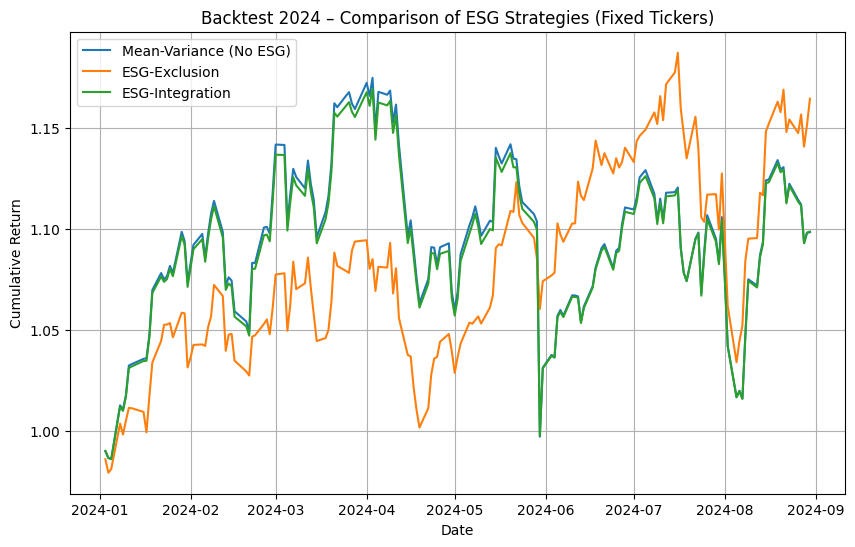

In [ ]:
# Parametri globali
TRADING_DAYS = 252
ESG_THRESHOLD = 0.5    # Soglia per la strategia ESG-Exclusion
ZETA = 0.01            # ESG tilt parameter per la strategia ESG-Integration
RISK_FREE_RATE = 0.01  # Tasso risk-free usato nella mean-variance

#path
df_prices = pd.read_csv(price_file_path, parse_dates=["Date"], index_col="Date")
df_prices.sort_index(inplace=True)

fixed_tickers = [
    'GLW', 'TER', 'TEL', 'CDW', 'ROP', 'AKAM', 'FTNT', 'VRSN',
    'ADI', 'MSI', 'CRM', 'ANSS', 'JNPR', 'AMAT', 'NOW', 'ADSK',
    'NXPI', 'INTU', 'SNPS', 'MU'
]

available_tickers = [t for t in fixed_tickers if t in df_prices.columns]

df_prices = df_prices[available_tickers]

#path
df_esg = pd.read_csv(esg_file_path)
df_esg_fixed = df_esg[df_esg['Symbol'].isin(available_tickers)].copy()

df_esg_fixed.sort_values('Symbol', inplace=True)
df_esg_fixed.reset_index(drop=True, inplace=True)

min_esg = df_esg_fixed['totalEsg'].min()
max_esg = df_esg_fixed['totalEsg'].max()
df_esg_fixed['normalized_ESG'] = (df_esg_fixed['totalEsg'] - min_esg) / (max_esg - min_esg)
df_esg_fixed.set_index('Symbol', inplace=True)

def portfolio_performance(weights, daily_returns, annualize_factor):
    mean_daily_ret = daily_returns.mean()
    port_return = np.sum(mean_daily_ret * weights) * annualize_factor
    port_cov = daily_returns.cov() * annualize_factor
    port_vol = np.sqrt(np.dot(weights.T, np.dot(port_cov, weights)))
    return port_return, port_vol

def negative_sharpe_ratio(weights, daily_returns, annualize_factor, rf=0.0):
    ret, vol = portfolio_performance(weights, daily_returns, annualize_factor)
    return -(ret - rf) / vol

def get_weights_mean_variance(daily_returns, annualize_factor, rf=0.0):
    num_assets = len(daily_returns.columns)
    init_w = np.array([1/num_assets]*num_assets)
    bounds = [(0,1)]*num_assets
    constraints = [{'type':'eq','fun': lambda x: np.sum(x) - 1}]

    result = minimize(
        fun=negative_sharpe_ratio,
        x0=init_w,
        args=(daily_returns, annualize_factor, rf),
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    return result.x

def get_weights_esg_exclusion(daily_returns, annualize_factor, esg_df, threshold=0.5):
    eligible_symbols = esg_df[esg_df['normalized_ESG'] >= threshold].index.tolist()
    valid_symbols = [t for t in eligible_symbols if t in daily_returns.columns]

    weights = np.zeros(len(daily_returns.columns))
    if len(valid_symbols) > 0:
        w = 1.0/len(valid_symbols)
        for i, col in enumerate(daily_returns.columns):
            if col in valid_symbols:
                weights[i] = w
    return weights

def get_weights_esg_integration(daily_returns, annualize_factor, esg_df, zeta=0.01):
    mu_annual = daily_returns.mean()*annualize_factor
    Sigma_annual = daily_returns.cov()*annualize_factor
    normalized = esg_df.loc[mu_annual.index, 'normalized_ESG']
    mu_mod = mu_annual + zeta*normalized

    def neg_sharpe_ratio_integration(w, mu, Sigma):
        ret = np.dot(w, mu)
        vol = np.sqrt(np.dot(w, np.dot(Sigma, w)))
        return -(ret / vol)

    init_w = np.array([1/len(mu_mod)]*len(mu_mod))
    bounds = [(0,1)]*len(mu_mod)
    constraints = [{'type':'eq','fun': lambda x: np.sum(x) - 1}]

    res = minimize(
        neg_sharpe_ratio_integration,
        init_w,
        args=(mu_mod.values, Sigma_annual),
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    return res.x

# PREPARAZIONE DEI DATI PER TRAIN (2023) E TEST (2024)

# training on 2023 data
df_prices_2023 = df_prices.loc["2023-01-01":"2023-12-31"]
train_returns_2023 = df_prices_2023.pct_change().dropna()

# test on 2024 data
df_prices_2024 = df_prices.loc["2024-01-01":"2024-12-31"]
test_returns_2024 = df_prices_2024.pct_change().dropna()

if df_prices_2024.empty:
    print("Attenzione: non ci sono dati di prezzo per il 2024 nel dataset!")

print("\nCostruzione dei portafogli su dati 2023...\n")
# a) Mean-Variance (without ESG)
weights_mv = get_weights_mean_variance(train_returns_2023, len(train_returns_2023), RISK_FREE_RATE)

# b) ESG-Exclusion
weights_excl = get_weights_esg_exclusion(train_returns_2023, len(train_returns_2023), df_esg_fixed, ESG_THRESHOLD)

# c) ESG-Integration
weights_integration = get_weights_esg_integration(train_returns_2023, len(train_returns_2023), df_esg_fixed, ZETA)


# BACKTEST SUI DATI 2024

common_tickers = available_tickers

w_dict_mv = dict(zip(train_returns_2023.columns, weights_mv))
w_dict_excl = dict(zip(train_returns_2023.columns, weights_excl))
w_dict_int = dict(zip(train_returns_2023.columns, weights_integration))

w_mv_2024 = np.array([w_dict_mv.get(t, 0.0) for t in common_tickers])
w_excl_2024 = np.array([w_dict_excl.get(t, 0.0) for t in common_tickers])
w_int_2024 = np.array([w_dict_int.get(t, 0.0) for t in common_tickers])

if w_mv_2024.sum() > 0:
    w_mv_2024 /= w_mv_2024.sum()
if w_excl_2024.sum() > 0:
    w_excl_2024 /= w_excl_2024.sum()
if w_int_2024.sum() > 0:
    w_int_2024 /= w_int_2024.sum()


daily_returns_2024 = test_returns_2024[common_tickers].copy()

port_ret_mv_2024 = (daily_returns_2024 * w_mv_2024).sum(axis=1)
port_ret_excl_2024 = (daily_returns_2024 * w_excl_2024).sum(axis=1)
port_ret_int_2024 = (daily_returns_2024 * w_int_2024).sum(axis=1)

def annual_stats(portfolio_returns):
    total_ret = (1+portfolio_returns).prod() - 1
    ann_ret = (1+portfolio_returns).prod()**(TRADING_DAYS/len(portfolio_returns)) - 1
    ann_vol = portfolio_returns.std()*np.sqrt(TRADING_DAYS)
    sharpe = (portfolio_returns.mean()/portfolio_returns.std())*np.sqrt(TRADING_DAYS) if portfolio_returns.std() != 0 else 0
    return total_ret, ann_ret, ann_vol, sharpe

mv_total, mv_ann, mv_vol, mv_sharpe = annual_stats(port_ret_mv_2024)
ex_total, ex_ann, ex_vol, ex_sharpe = annual_stats(port_ret_excl_2024)
int_total, int_ann, int_vol, int_sharpe = annual_stats(port_ret_int_2024)

print("\n===== BACKTEST 2024 RESULTS =====")
print("Mean-Variance (no ESG) => "
      f"Total Ret: {mv_total:.2%}, Annual Ret: {mv_ann:.2%}, Vol: {mv_vol:.2%}, Sharpe: {mv_sharpe:.2f}")
print("ESG-Exclusion => "
      f"Total Ret: {ex_total:.2%}, Annual Ret: {ex_ann:.2%}, Vol: {ex_vol:.2%}, Sharpe: {ex_sharpe:.2f}")
print("ESG-Integration => "
      f"Total Ret: {int_total:.2%}, Annual Ret: {int_ann:.2%}, Vol: {int_vol:.2%}, Sharpe: {int_sharpe:.2f}")

cum_mv = (1+port_ret_mv_2024).cumprod()
cum_excl = (1+port_ret_excl_2024).cumprod()
cum_int = (1+port_ret_int_2024).cumprod()

plt.figure(figsize=(10,6))
plt.plot(cum_mv.index, cum_mv.values, label='Mean-Variance (No ESG)')
plt.plot(cum_excl.index, cum_excl.values, label='ESG-Exclusion')
plt.plot(cum_int.index, cum_int.values, label='ESG-Integration')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Backtest 2024 – Comparison of ESG Strategies (Fixed Tickers)')
plt.legend()
plt.grid(True)
plt.show()


In 2023, the Mean-Variance strategy delivered an exceptional performance, achieving a return of 79.80% and a high Sharpe Ratio of 3.36, indicating an excellent balance between risk and return. However, in 2024, the return dropped drastically to 9.83%, while volatility remained high at 23.93%. This significant decline suggests that the optimized portfolio did not adapt well to the new market conditions, likely due to overfitting to 2023 data.

The ESG-Exclusion strategy, on the other hand, demonstrated greater stability over time. In 2023, it achieved a return of 33.00% with relatively contained volatility at 18.95%, resulting in a Sharpe Ratio of 1.74. In 2024, despite a slight increase in volatility to 19.31%, the return remained solid at 16.44%, with a Sharpe Ratio of 1.29. This consistency in performance makes it the most effective strategy in 2024, suggesting that excluding low-ESG companies contributed to a more resilient and stable outcome over time.

Finally, the ESG-Integration strategy performed well in 2023, with a return of 54.89% and volatility of 19.26%, achieving a Sharpe Ratio of 2.85. However, in 2024, it experienced a sharp decline, with a return of 9.86% and increased volatility at 23.33%, bringing its Sharpe Ratio down to 0.73. While it slightly outperformed the Mean-Variance strategy in terms of Sharpe Ratio (0.73 vs. 0.71), it still underperformed compared to the ESG-Exclusion strategy. This suggests that incorporating ESG factors into expected return calculations did not necessarily lead to better out-of-sample performance.

Overall, the analysis highlights that while the Mean-Variance strategy delivered impressive short-term results, its lack of adaptability to subsequent market conditions limited its effectiveness in 2024. On the other hand, the ESG-Exclusion strategy proved to be the most solid and resilient, offering the best balance between return and risk across both years.